# Classification
Dans ce notebook nous allons explorer les résultats de notre classification manuelle effectuée sur les données nettoyées et séléctionniée précédemment. 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from constants import *

Dans un premier temps, nous lions les occurences de métiers avec leurs catégories, secteur, etc 

In [7]:
job_occ = pd.read_csv(SELECTED_JOB_COUNT, index_col=0)
job_occ

,profession,annee,occ
0,agent,1845,1
1,agent,1848,1
2,agent,1858,12
3,agent,1859,1
4,agent,1863,1
...,...,...,...
10976,volontaire,1894,15
10977,volontaire,1895,40
10978,volontaire,1896,23
10979,volontaire,1897,15


In [8]:
def from_string_to_list(s):
    if (type(s) == type("abc")):
        terms = s.split(",")
        return [term.strip() for term in terms]

job_info = pd.read_csv(JOB_CLASSIFICATION)
job_info["categories"] = job_info["categories"].apply(from_string_to_list)

job_info

,Nom_metier,categories,secteur,terme_generique
0,agent de police,"[fonctionnaire, ordre]",tertiaire,agent de police
1,agriculteur,[agriculture],primaire,agriculteur
2,aide,[manoeuvre],tertiaire,manoeuvre
3,apprenti,[apprenti],NSP,apprenti
4,apprenti negociant,"[commerce, apprenti, négoce]",tertiaire,negociant
...,...,...,...,...
254,viticulteur,"[vin, agriculture]",primaire,vigneron
255,vitrier,"[bâtiment, verre]",secondaire,vitrier
256,voiturier,"[véhicule, transport]",tertiaire,voiturier
257,volontaire,[militaire],NaN,NaN


In [9]:
job_info.explode("categories").nunique()

Nom_metier         257
categories          64
secteur              4
terme_generique    170
dtype: int64

In [10]:
job_occ_info = job_occ.set_index("annee").join(job_occ.groupby("annee")["occ"].sum().to_frame(), lsuffix = "_job", rsuffix ="_pop")
job_occ_info = job_occ.set_index("profession").join(job_info.set_index("Nom_metier"), how="inner").reset_index()
job_occ_info

,index,annee,occ,categories,secteur,terme_generique
0,agent de police,1859,6,"[fonctionnaire, ordre]",tertiaire,agent de police
1,agent de police,1860,11,"[fonctionnaire, ordre]",tertiaire,agent de police
2,agent de police,1861,6,"[fonctionnaire, ordre]",tertiaire,agent de police
3,agent de police,1862,8,"[fonctionnaire, ordre]",tertiaire,agent de police
4,agent de police,1863,9,"[fonctionnaire, ordre]",tertiaire,agent de police
...,...,...,...,...,...,...
10879,volontaire,1894,15,[militaire],NaN,NaN
10880,volontaire,1895,40,[militaire],NaN,NaN
10881,volontaire,1896,23,[militaire],NaN,NaN
10882,volontaire,1897,15,[militaire],NaN,NaN


### Generic terms
Nous nous intéressons premièrement à la classification par termes génériques.

In [11]:
df_gerneric_term = job_occ_info.groupby(["terme_generique", "annee"]).sum("occ").reset_index()
df_gerneric_term

,terme_generique,annee,occ
0,agent de police,1859,6
1,agent de police,1860,11
2,agent de police,1861,6
3,agent de police,1862,8
4,agent de police,1863,9
...,...,...,...
8373,voiturier,1894,11
8374,voiturier,1895,27
8375,voiturier,1896,24
8376,voiturier,1897,18


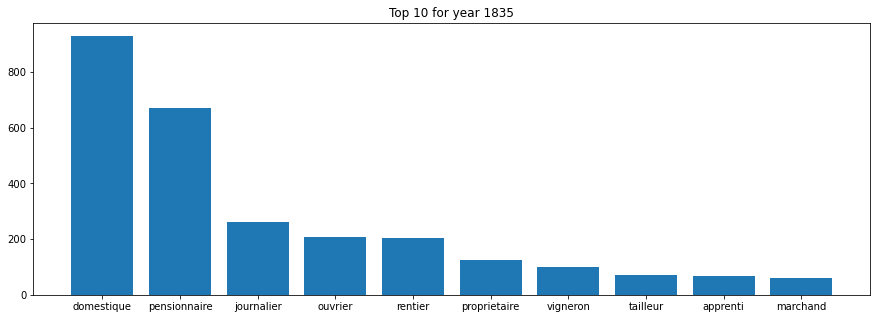

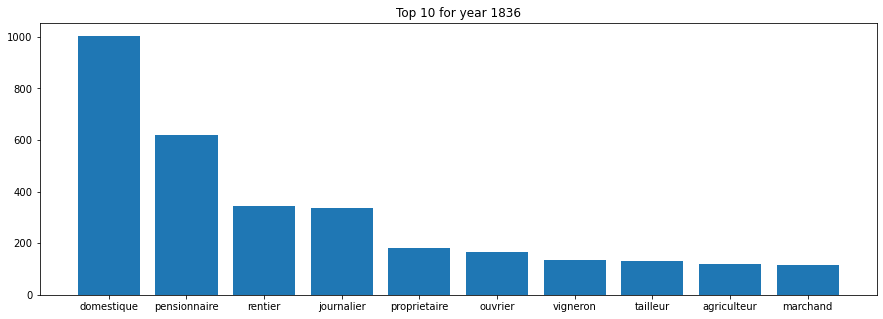

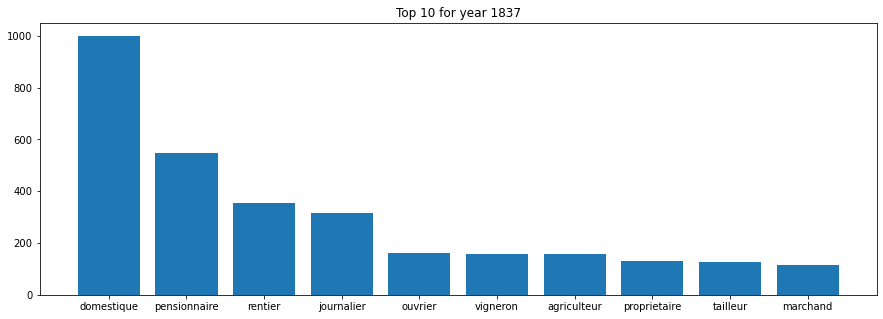

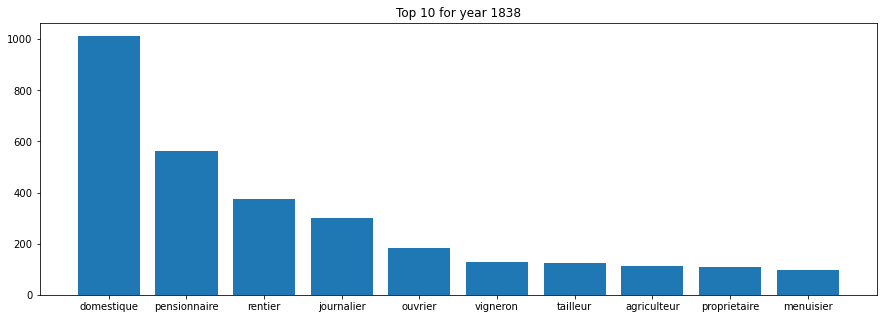

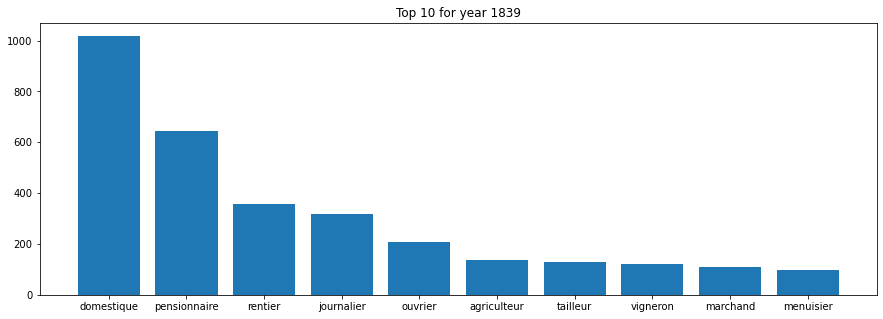

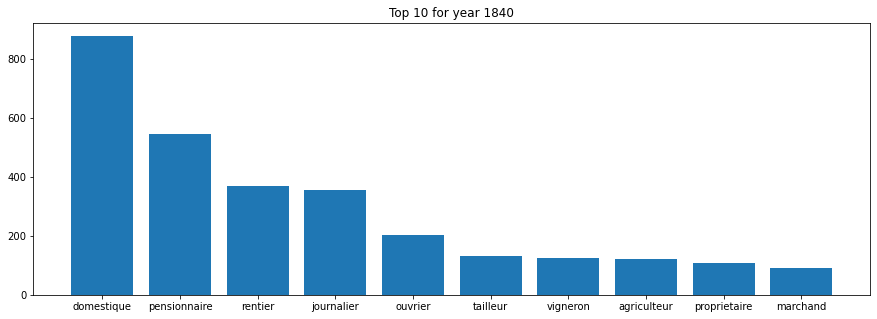

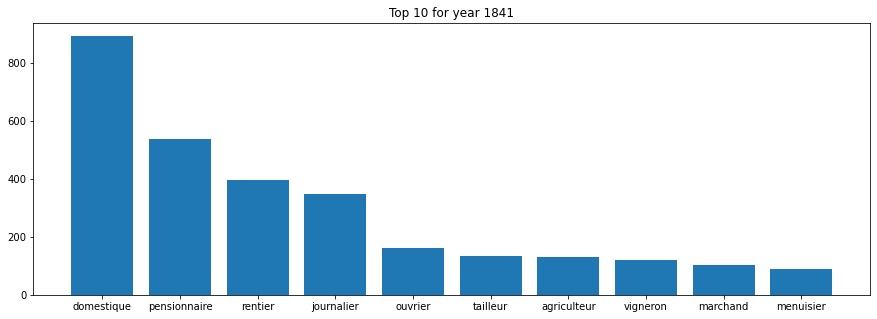

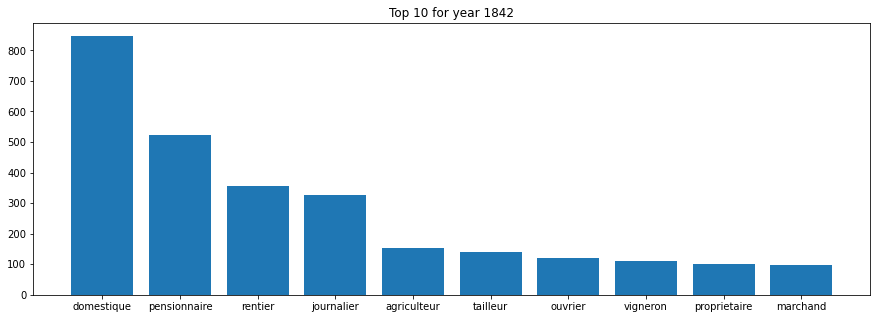

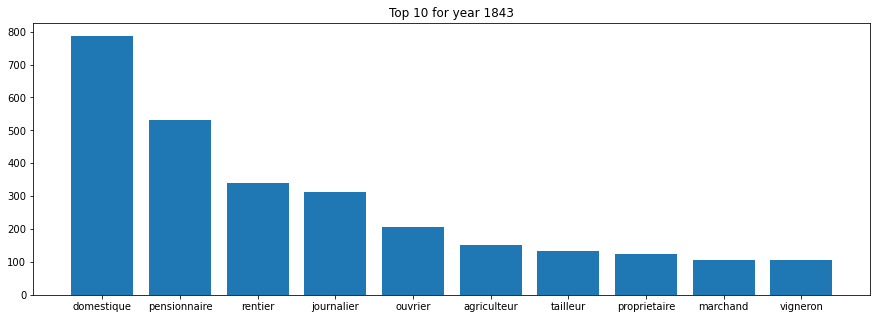

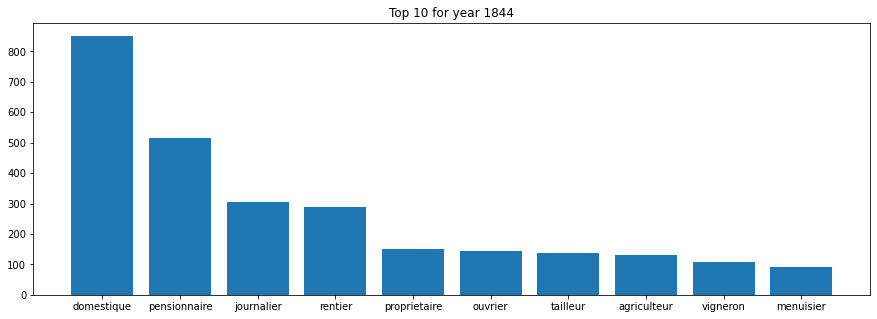

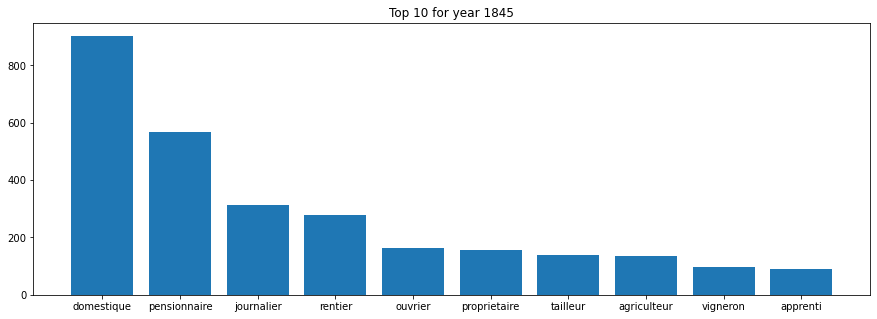

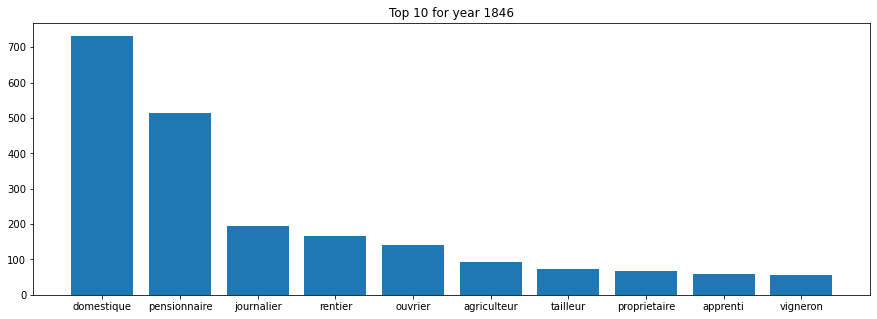

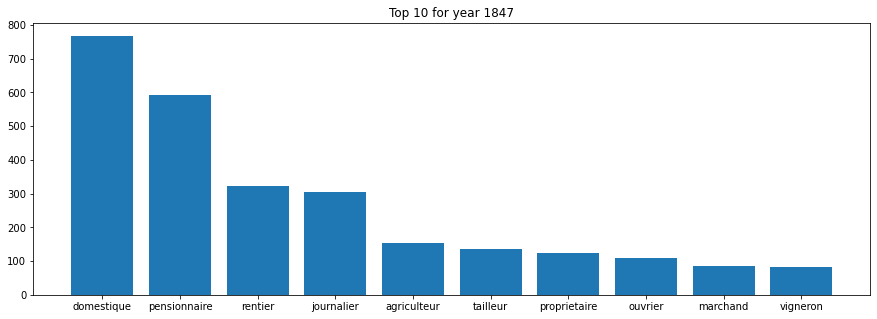

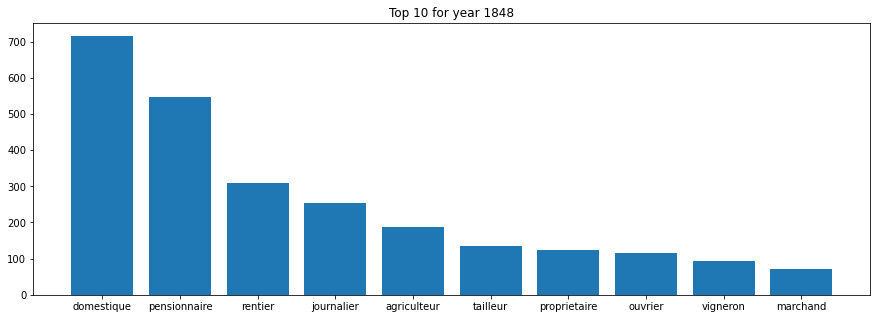

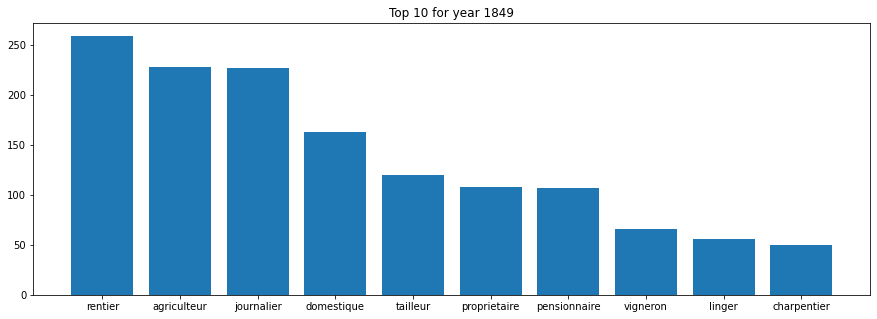

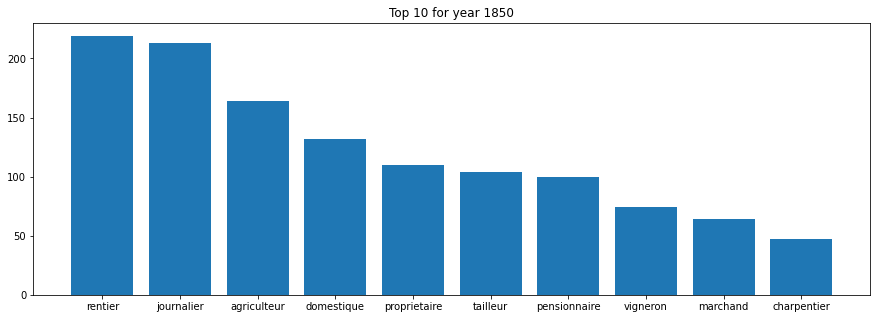

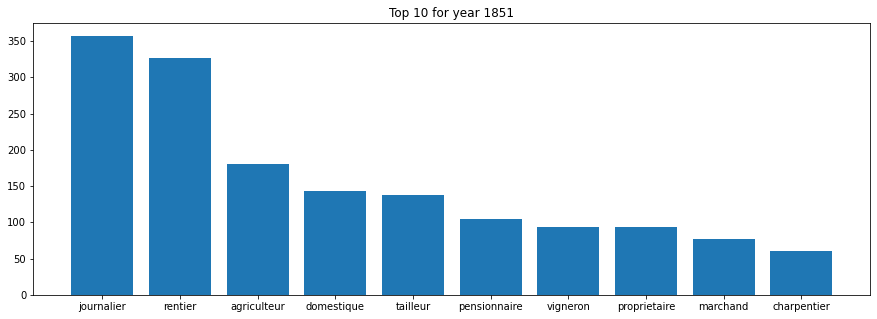

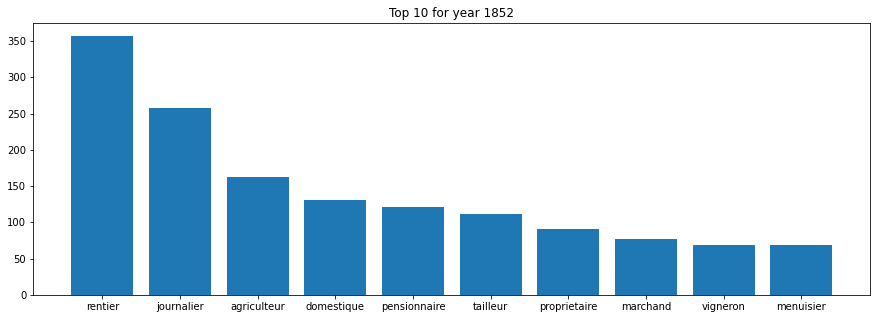

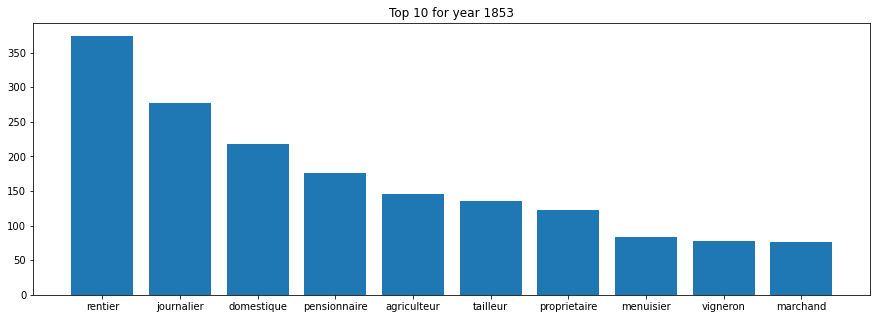

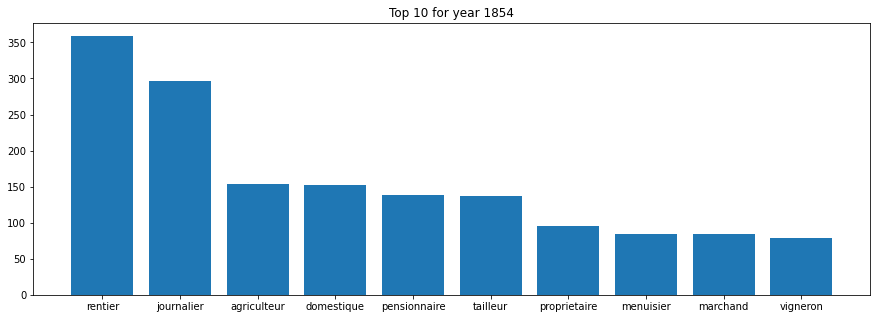

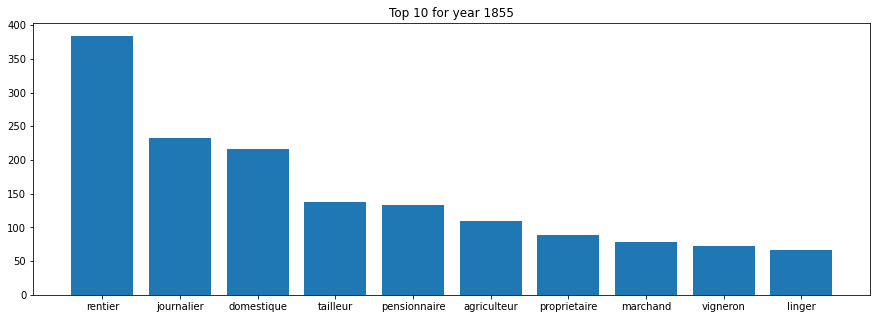

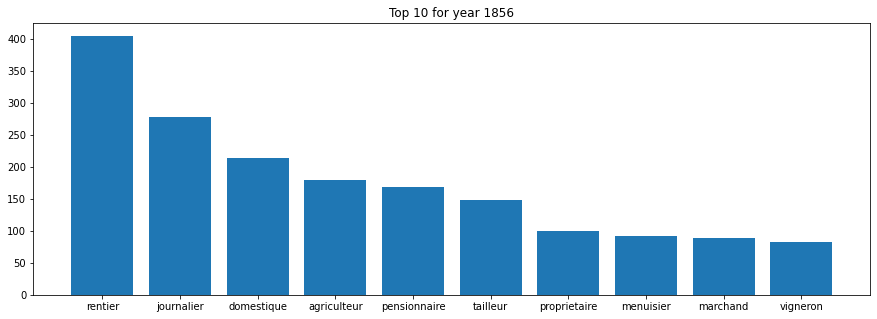

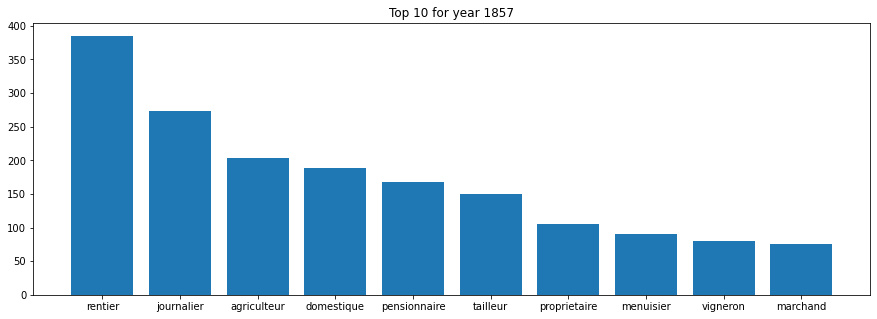

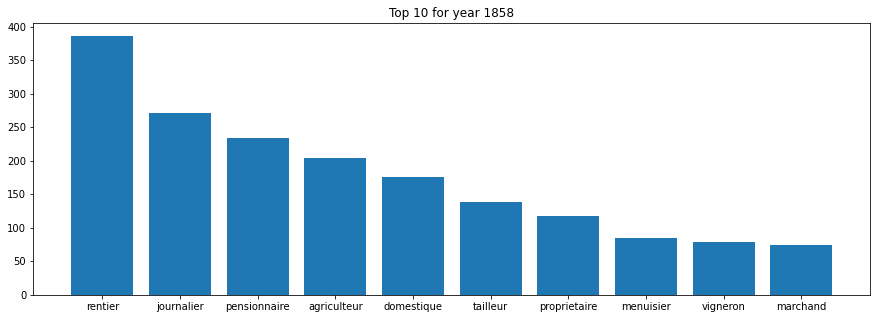

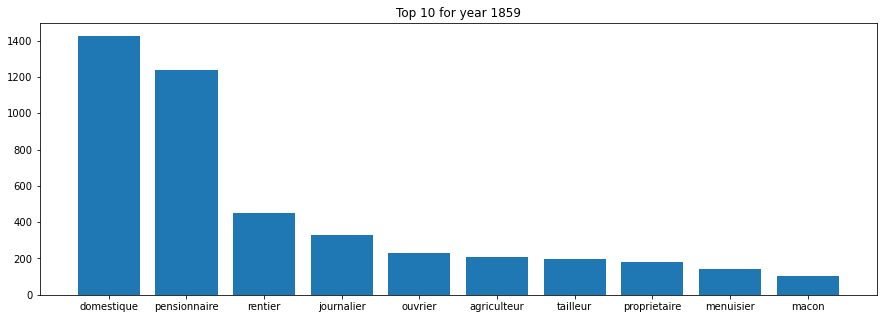

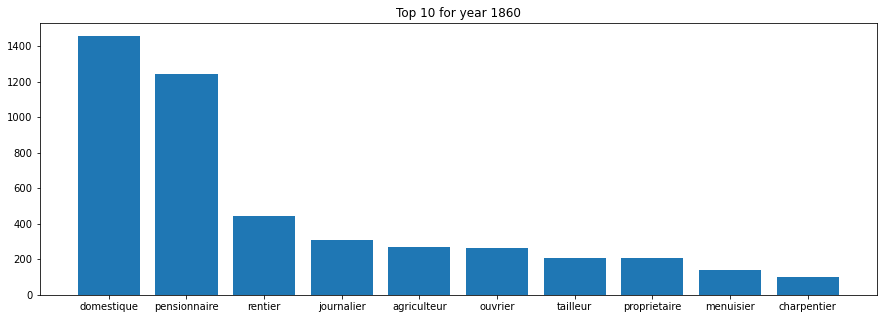

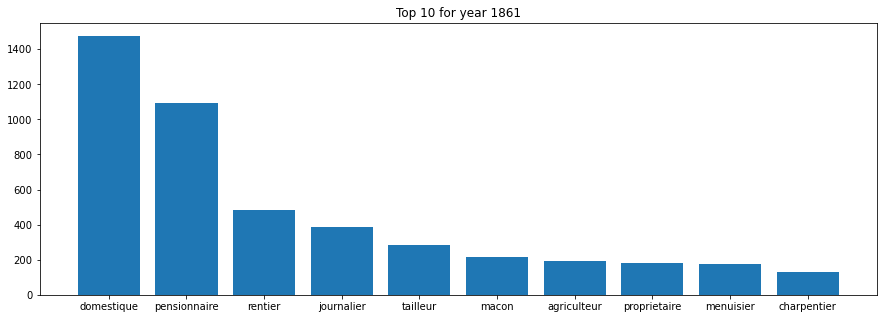

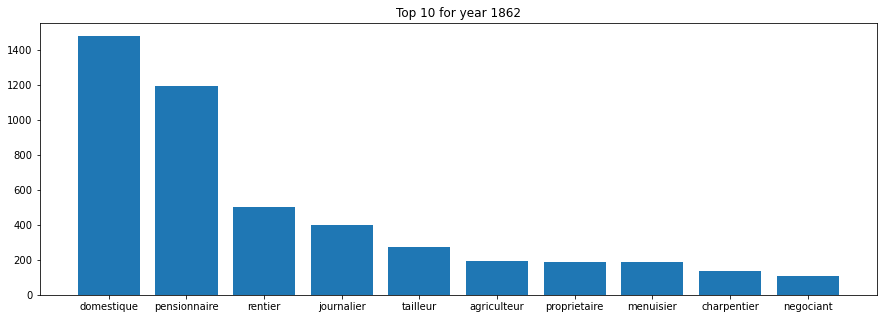

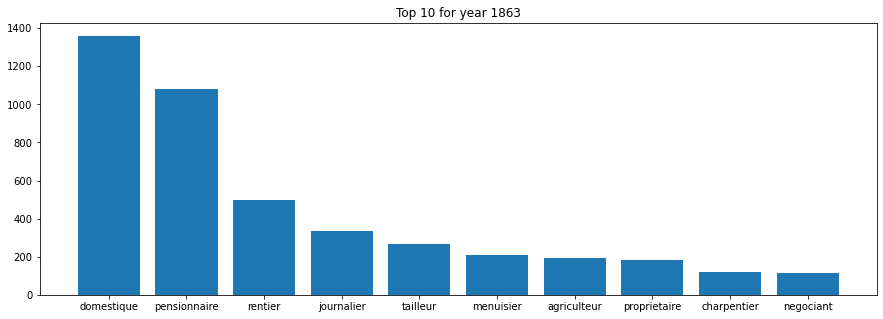

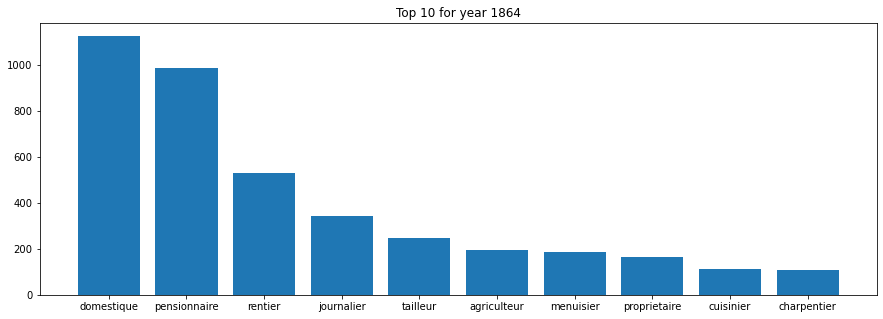

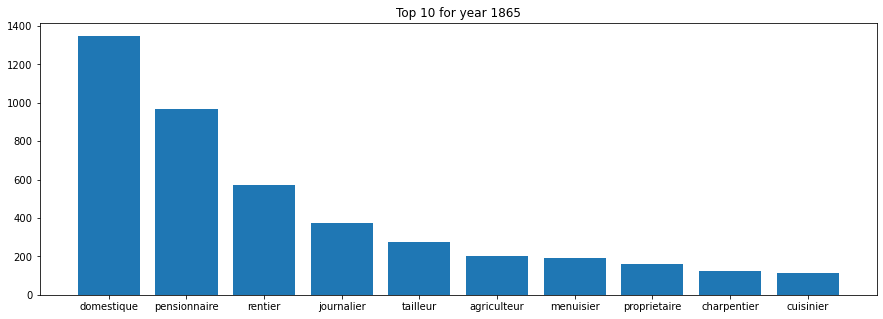

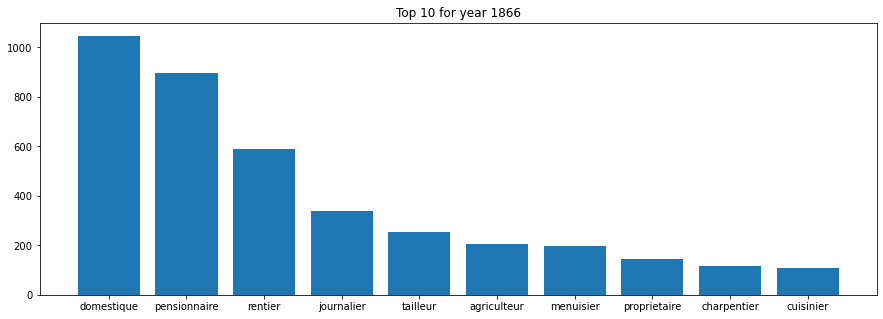

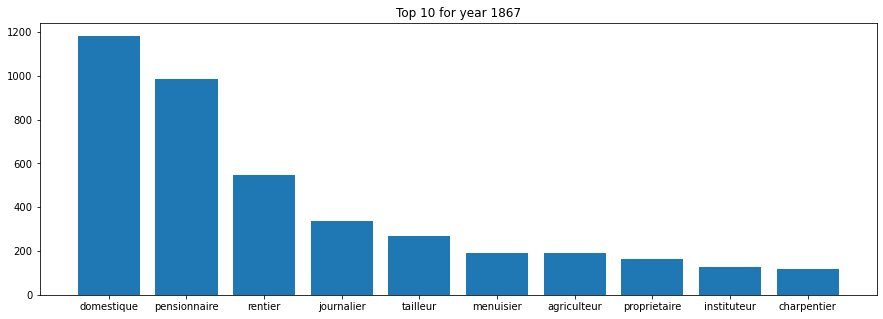

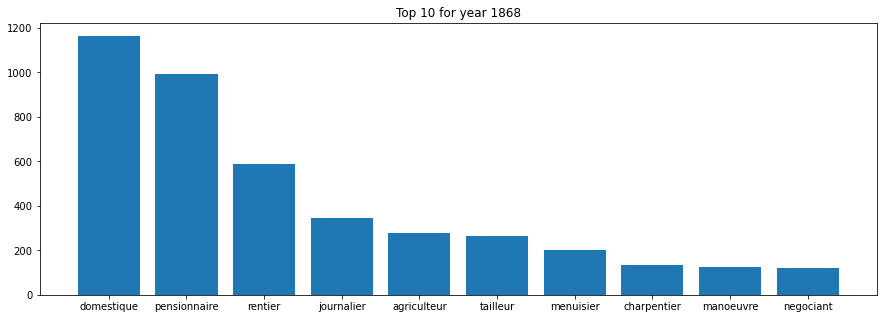

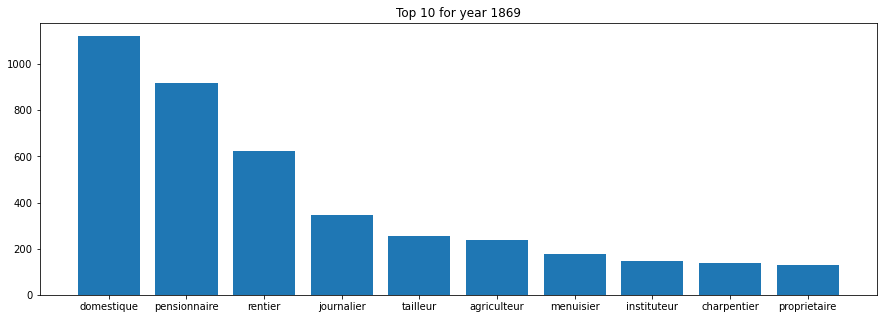

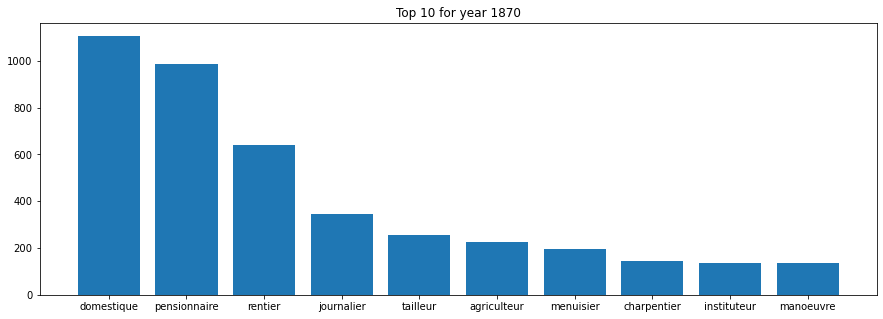

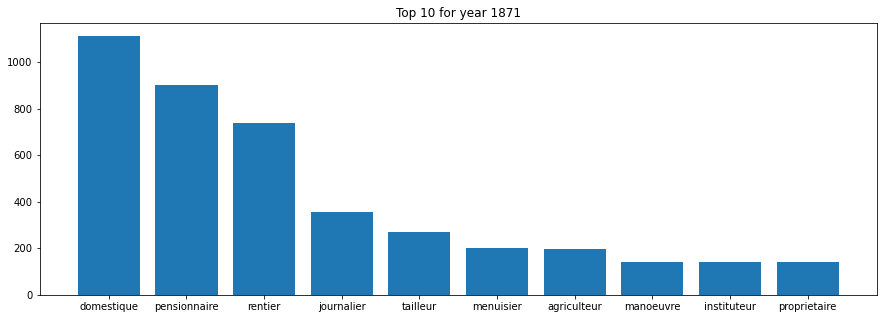

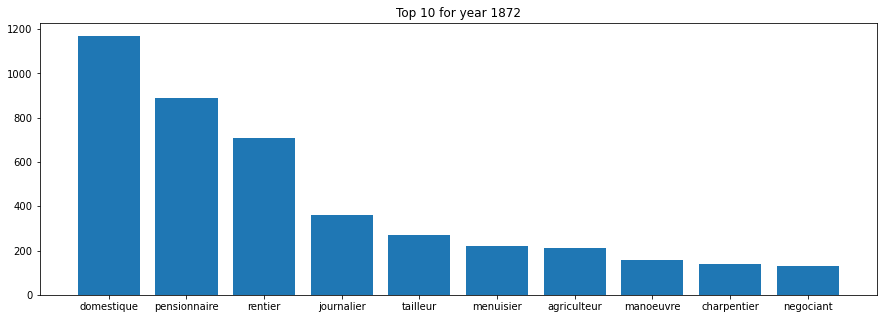

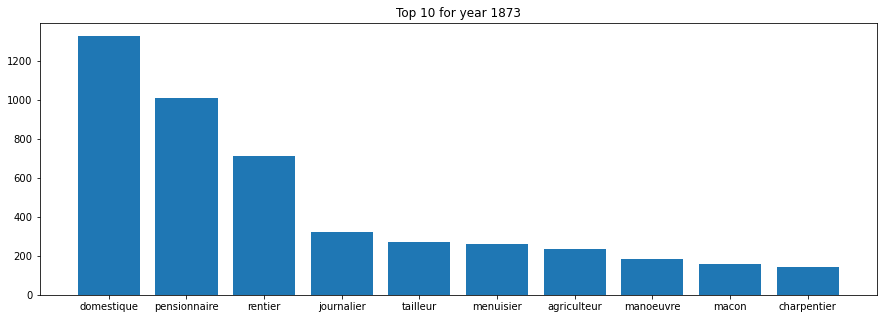

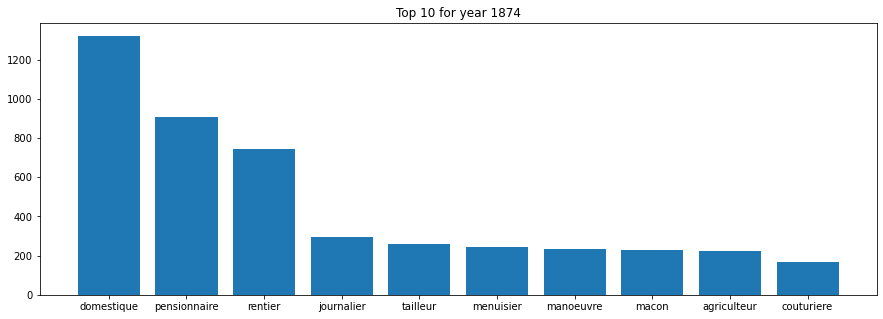

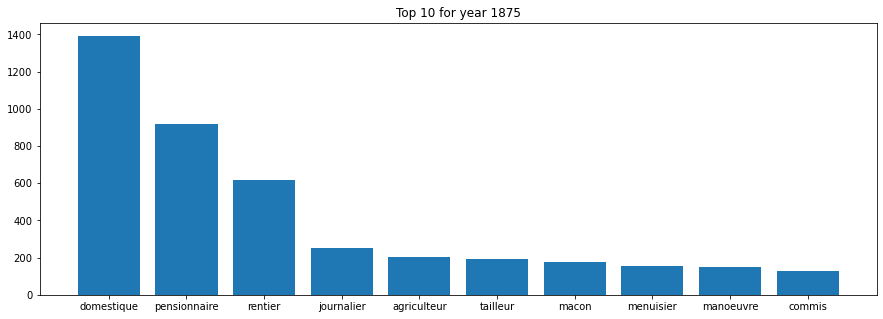

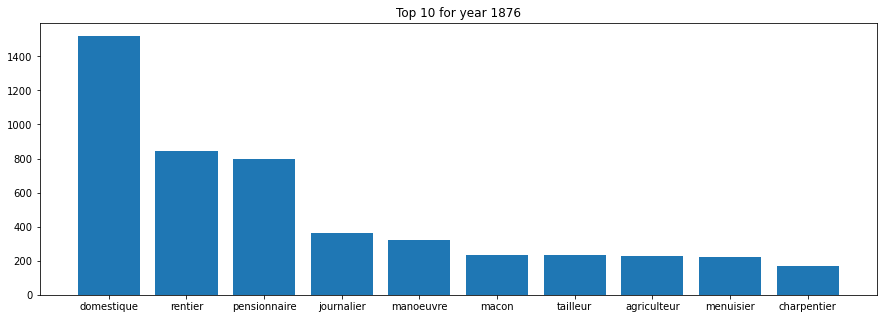

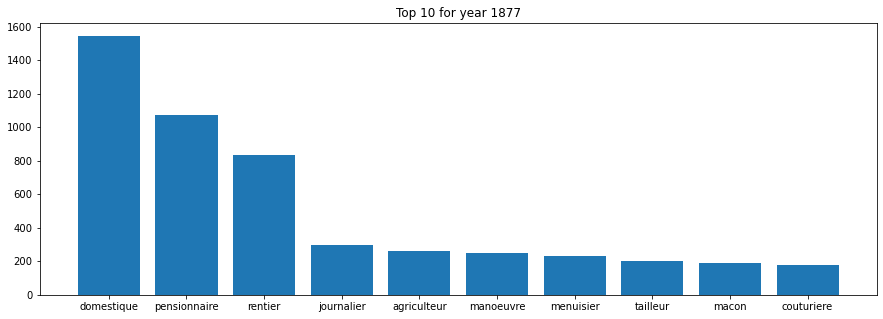

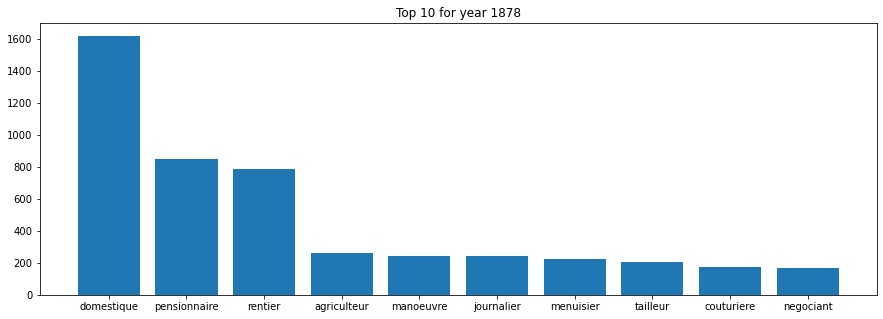

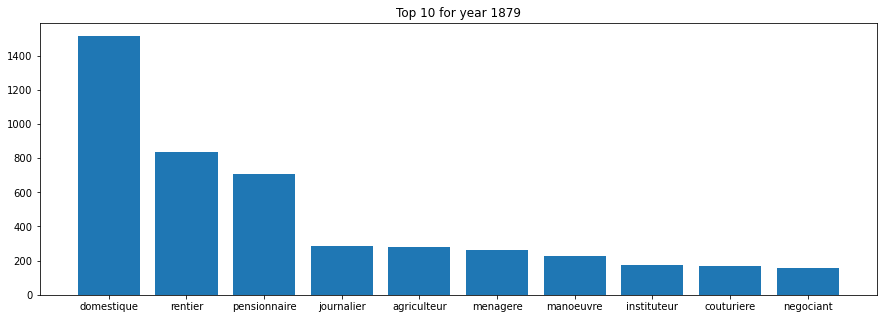

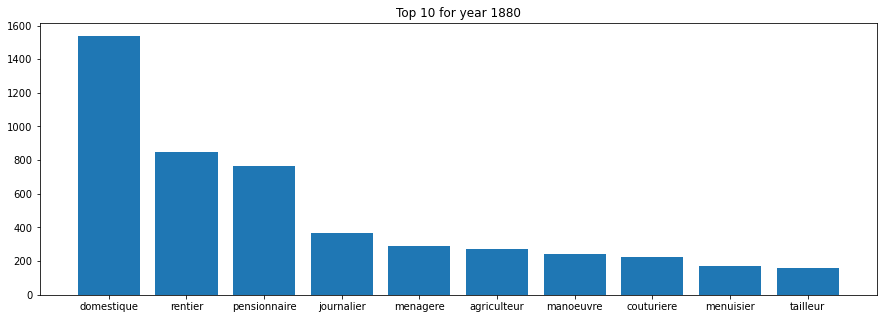

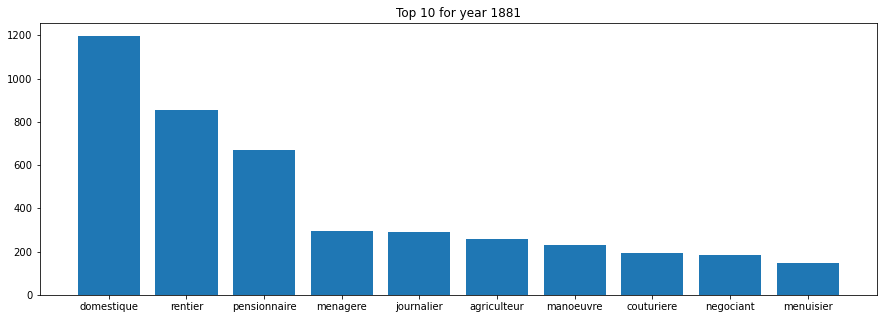

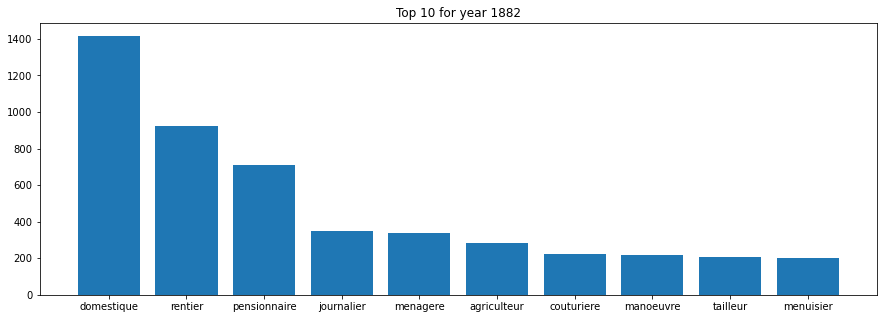

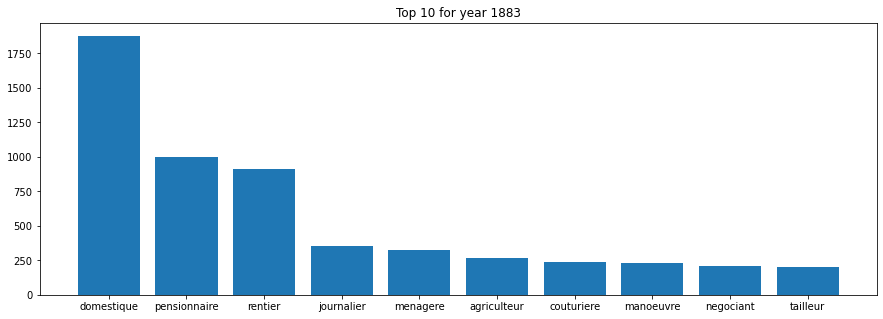

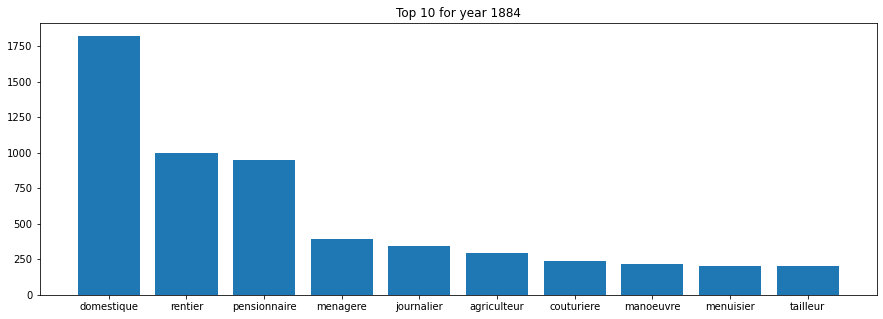

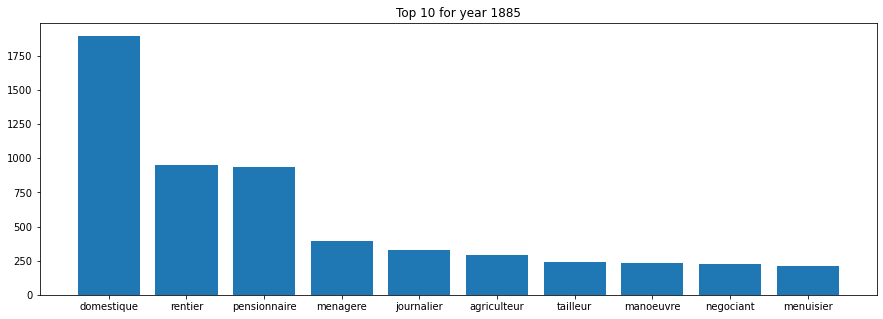

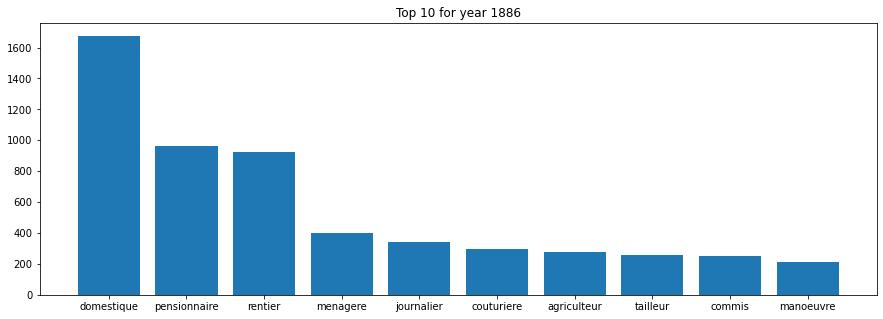

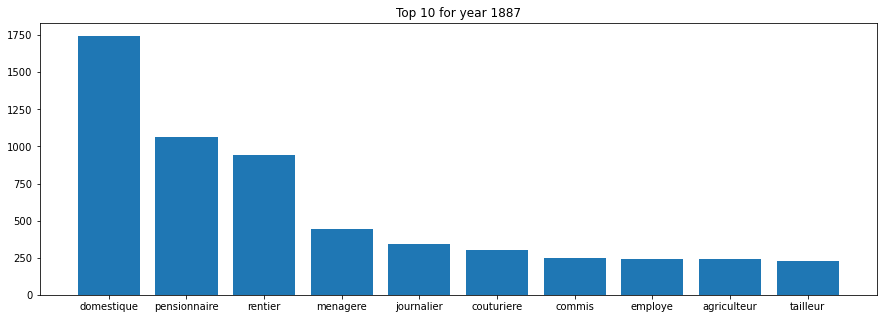

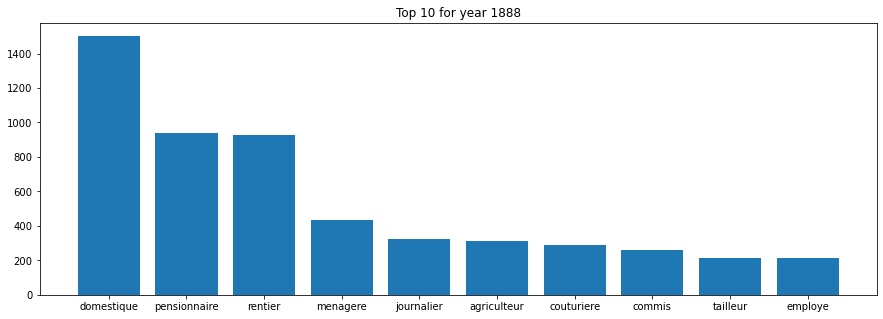

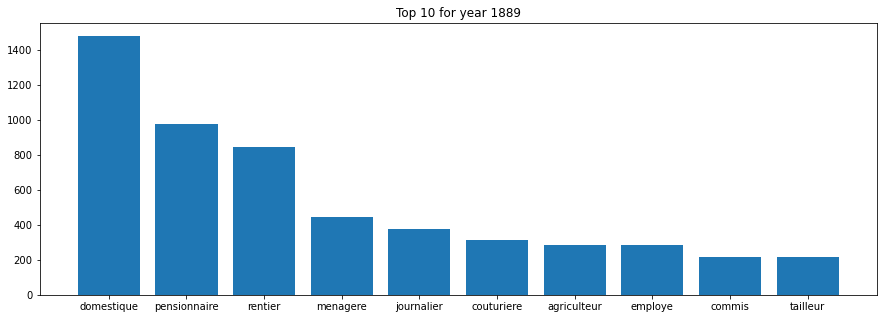

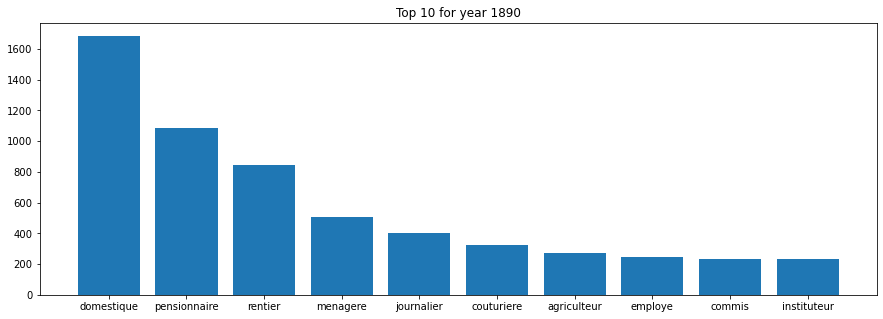

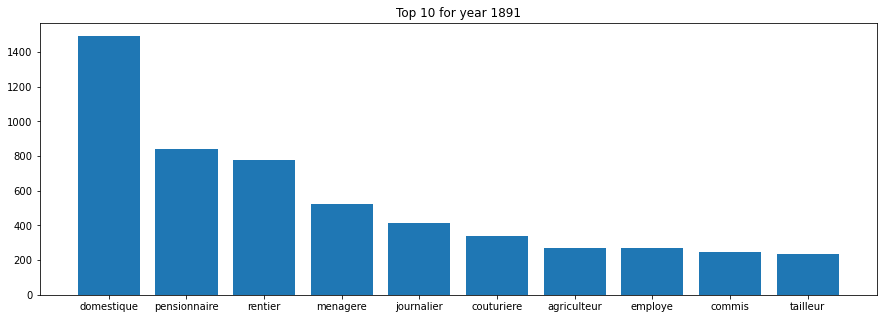

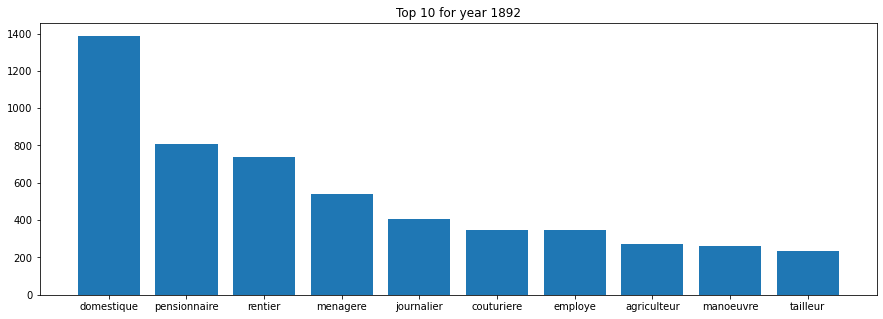

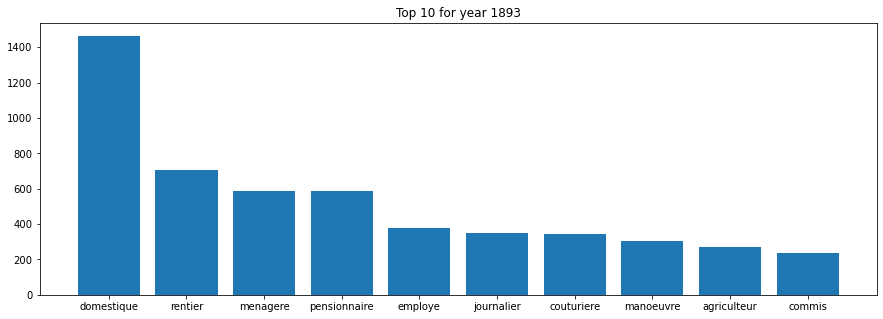

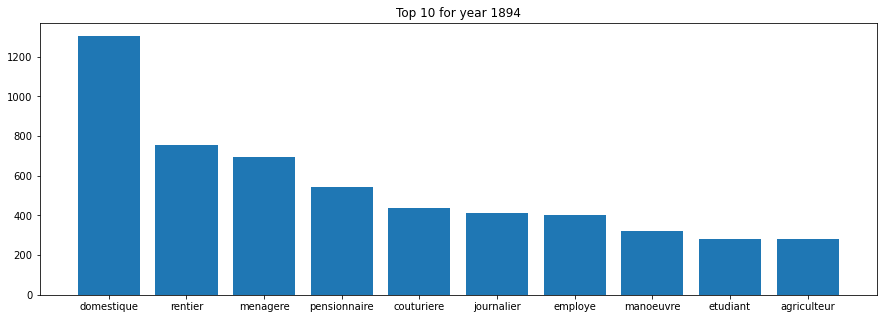

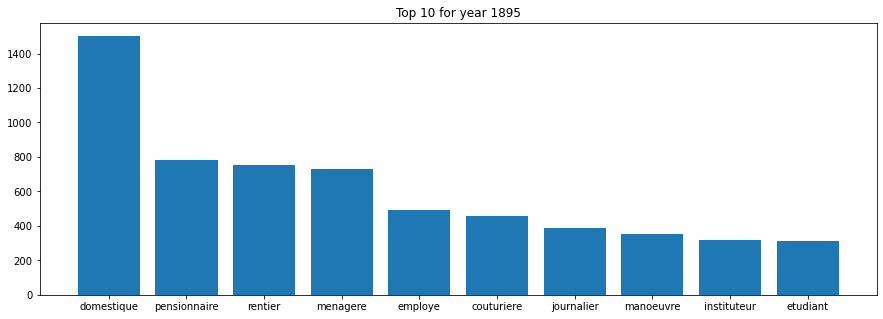

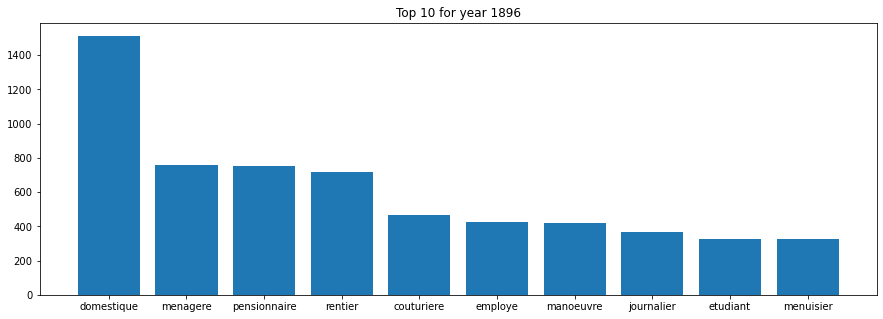

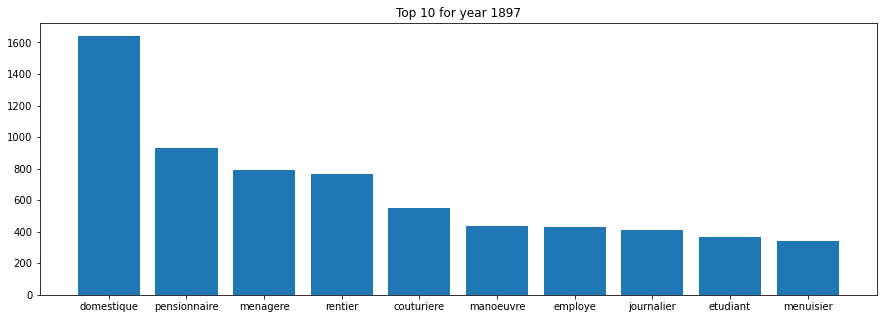

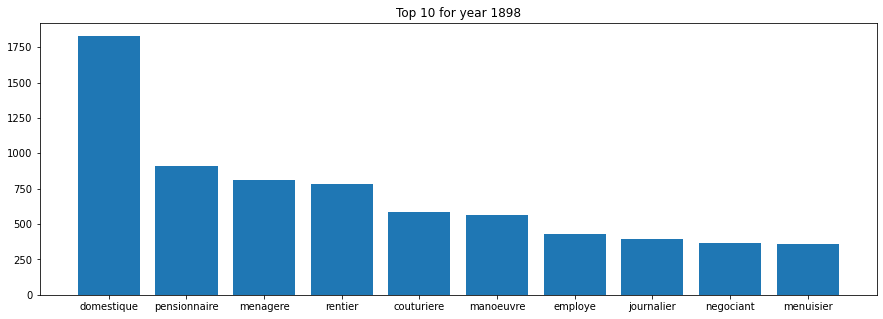

In [12]:
NUM_JOB_BY_YEAR = 10
years = df_gerneric_term["annee"].unique()
years = sorted(years)
for year in years:
    data = df_gerneric_term[df_gerneric_term["annee"] == year].sort_values("occ")[::-1][:NUM_JOB_BY_YEAR]
    plt.figure(figsize=(15, 5))
    plt.bar(data["terme_generique"], data["occ"])
    plt.title(f'Top {NUM_JOB_BY_YEAR} for year {year}')
    plt.savefig(PLOT_DIR+"top_generic-job_year/"+ str(year) + ".png")
    plt.show()

### Secteur

In [13]:
df_secteur = job_occ_info.groupby(["secteur", "annee"]).sum("occ").reset_index() 
df_secteur

,secteur,annee,occ
0,NSP,1835,339
1,NSP,1836,399
2,NSP,1837,384
3,NSP,1838,376
4,NSP,1839,404
...,...,...,...
251,tertiaire,1894,5405
252,tertiaire,1895,6144
253,tertiaire,1896,6080
254,tertiaire,1897,6480


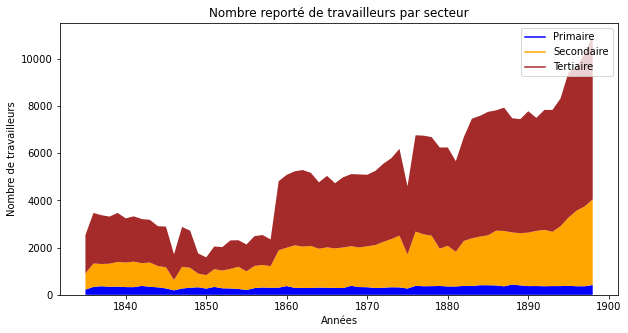

In [14]:
prim = df_secteur[df_secteur["secteur"] == "primaire"].sort_values("annee")["occ"]
sec = df_secteur[df_secteur["secteur"] == "secondaire"].sort_values("annee")["occ"]
ter = df_secteur[df_secteur["secteur"] == "tertiaire"].sort_values("annee")["occ"]
years = sorted(df_secteur["annee"].unique())

# Plot x-labels, y-label and data
plt.figure(figsize=(10, 5))

plt.plot([], [], color ='blue',
         label ='Primaire')
plt.plot([], [], color ='orange',
         label ='Secondaire')
plt.plot([], [], color ='brown',
         label ='Tertiaire')

plt.stackplot(years, prim, sec, ter, colors =['blue', 'orange','brown'])

plt.legend()
 
plt.title('Nombre reporté de travailleurs par secteur')
plt.xlabel('Années')
plt.ylabel('Nombre de travailleurs')
 
plt.show()

## Catégories
Nous allons étudier l'évolution des catégories au fil des ans

In [15]:
cat_occ_year = job_occ_info.explode("categories").groupby(["annee", "categories"]).sum().reset_index()
cat_occ_year

,annee,categories,occ
0,1835,NA,6
1,1835,agriculture,111
2,1835,alimentation,71
3,1835,animaux,10
4,1835,apprenti,69
...,...,...,...
3882,1898,verre,14
3883,1898,viande,97
3884,1898,vin,159
3885,1898,véhicule,265


In [16]:
categories = sorted(cat_occ_year["categories"].unique())

In [17]:
def plot_evolution_cat(df, cat, plot_dir):
    data = df[df["categories"]==cat]
    plt.plot(data["annee"], data["occ"])
    plt.title(f"Evolution de la catégorie '{cat}' au fil des ans")
    plt.savefig(PLOT_DIR+ plot_dir +cat + ".png")
    plt.show()

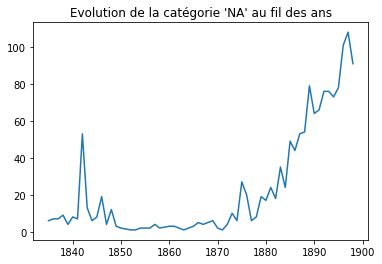

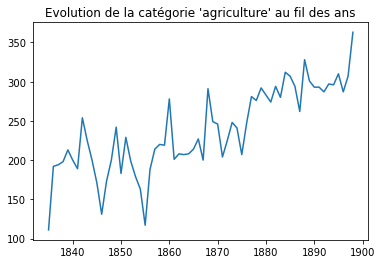

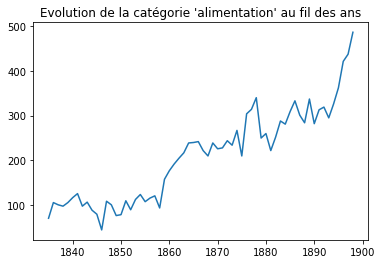

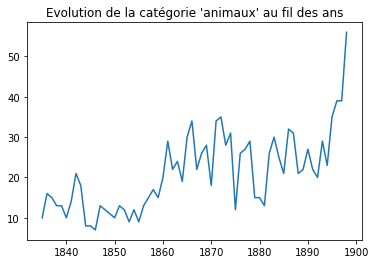

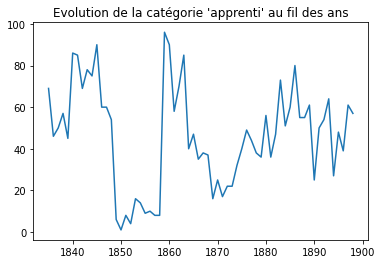

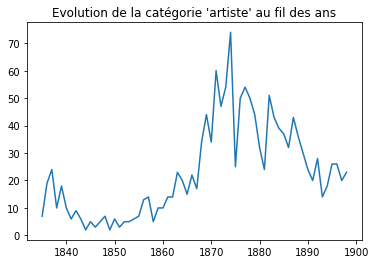

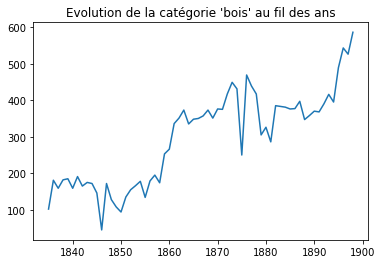

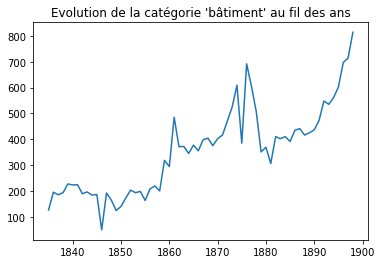

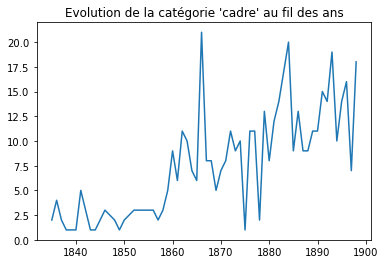

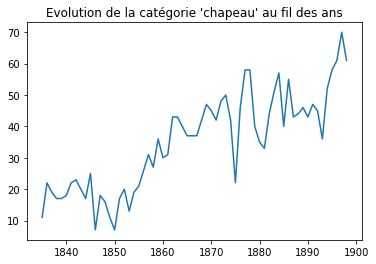

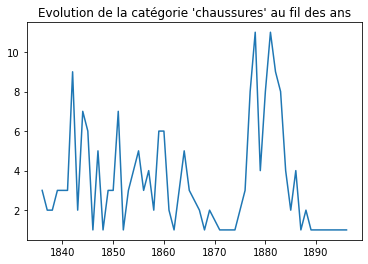

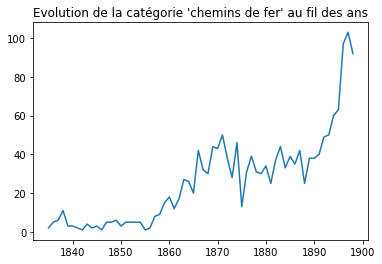

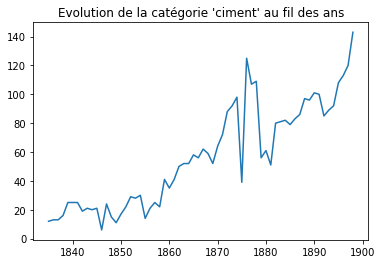

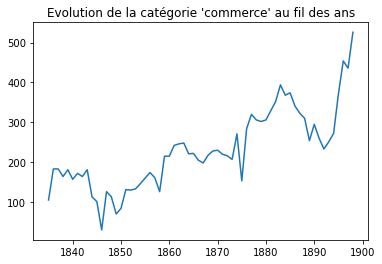

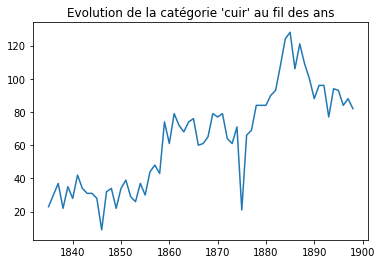

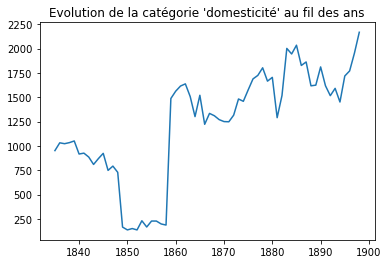

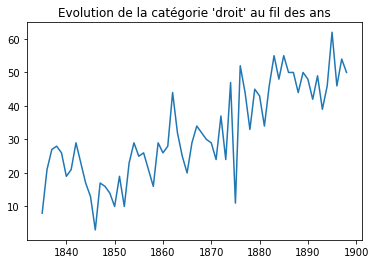

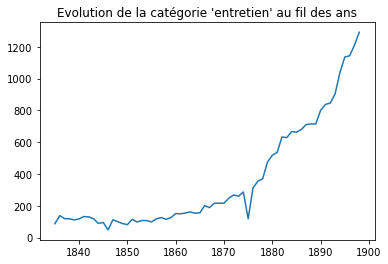

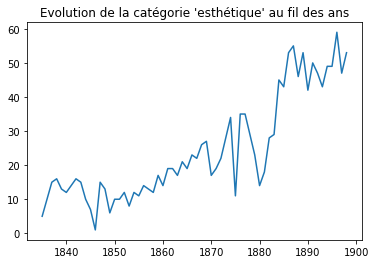

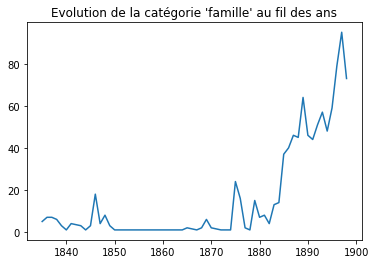

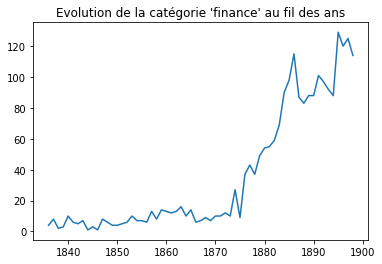

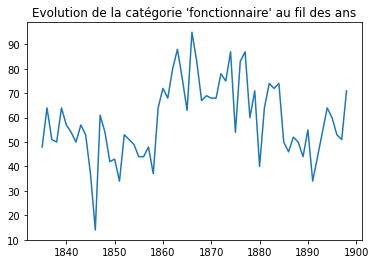

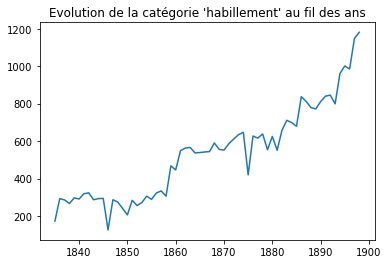

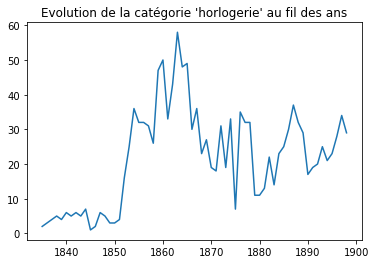

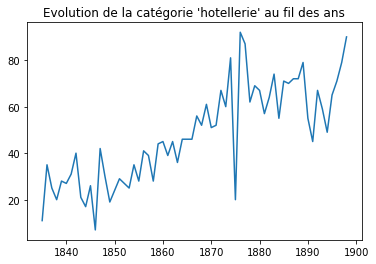

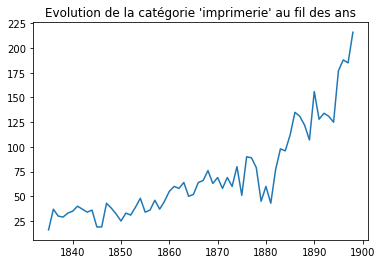

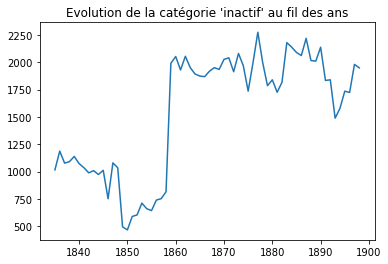

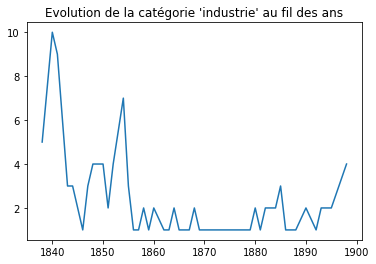

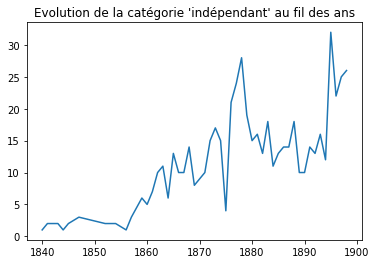

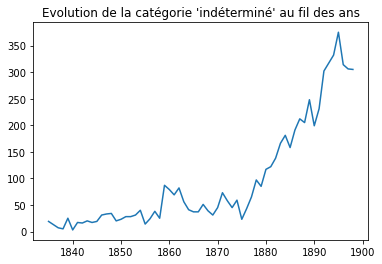

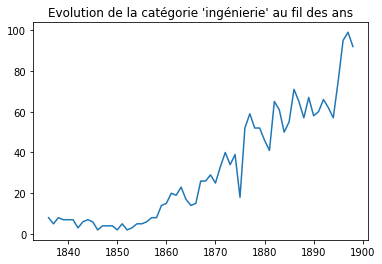

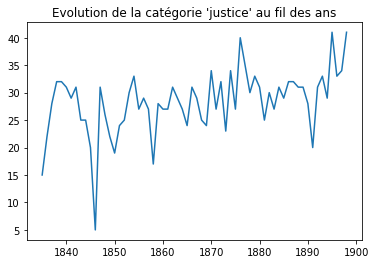

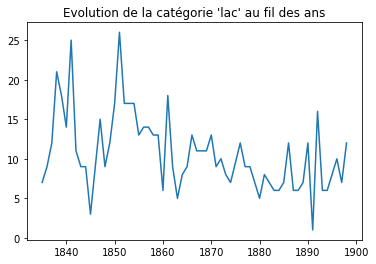

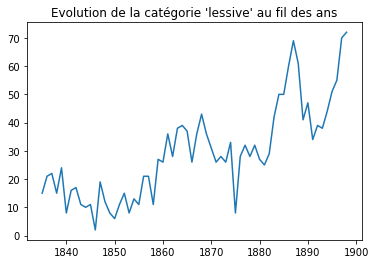

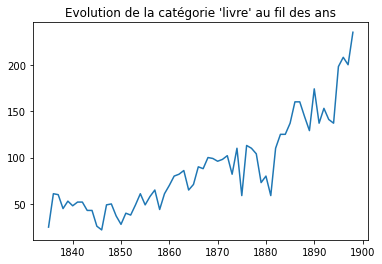

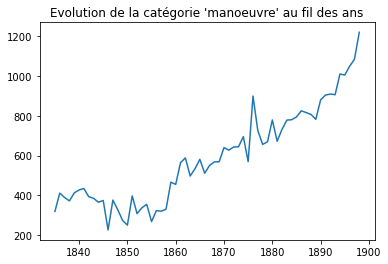

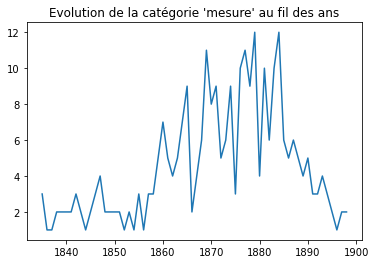

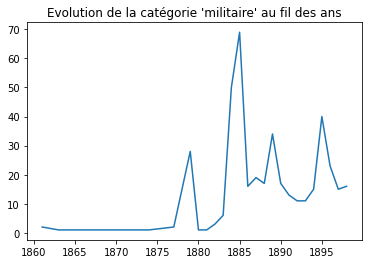

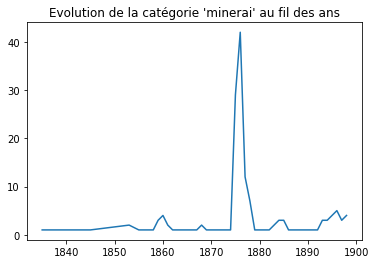

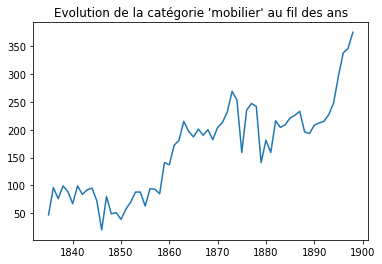

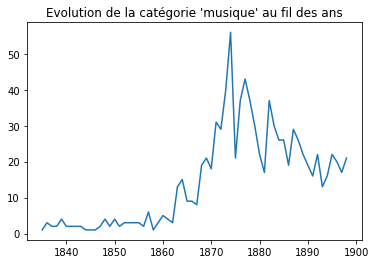

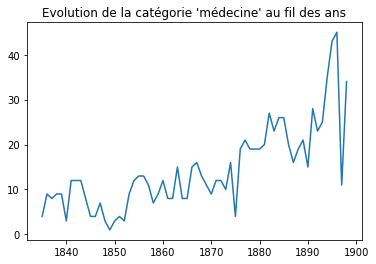

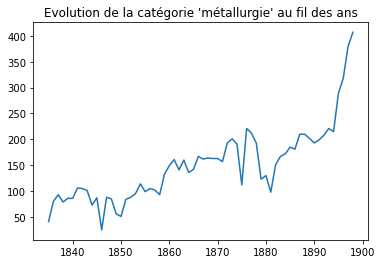

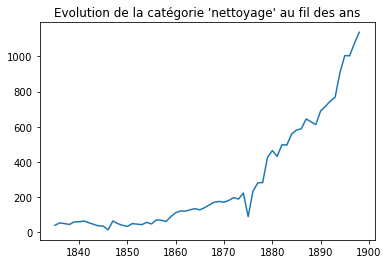

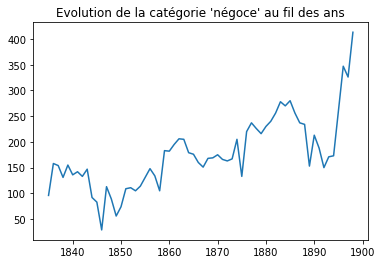

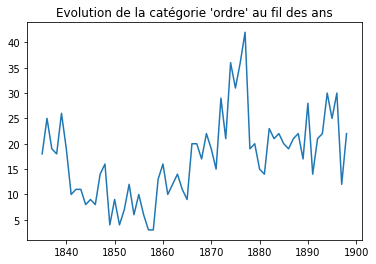

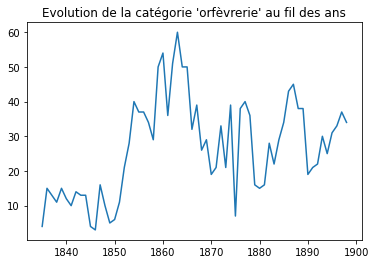

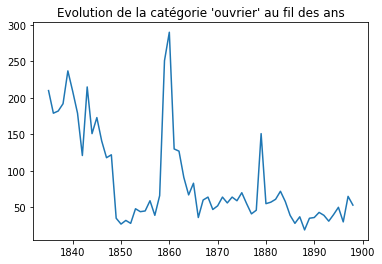

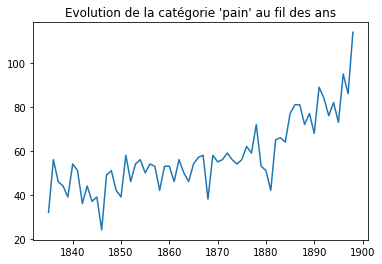

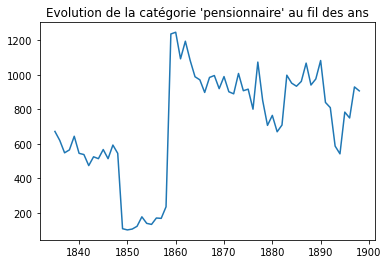

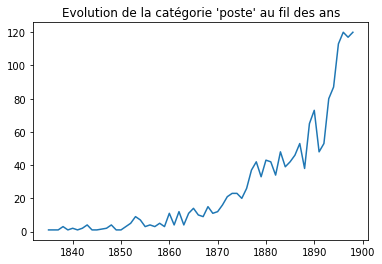

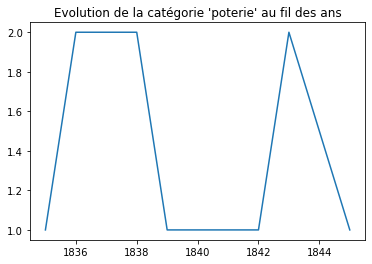

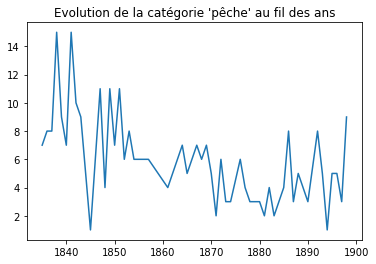

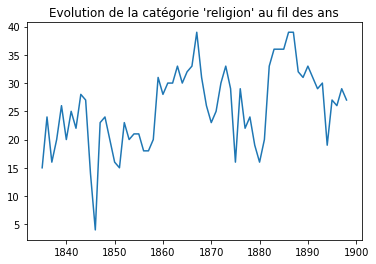

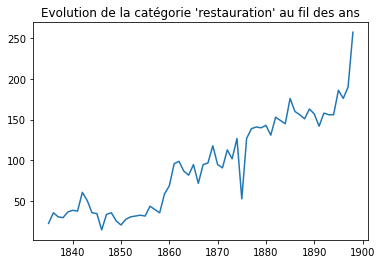

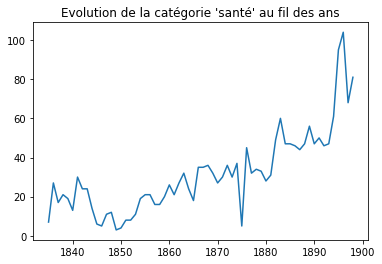

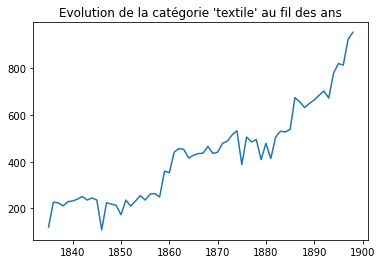

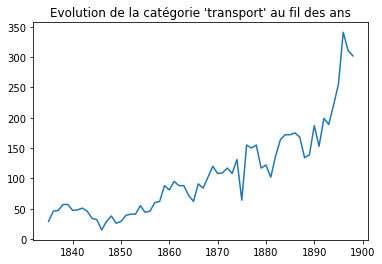

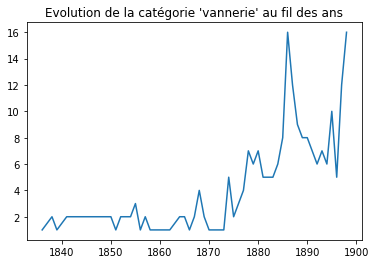

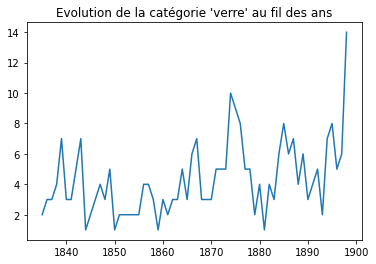

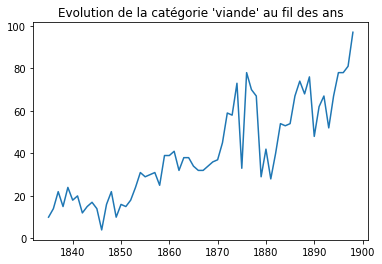

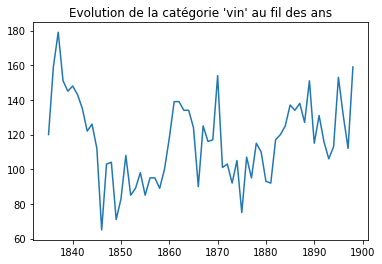

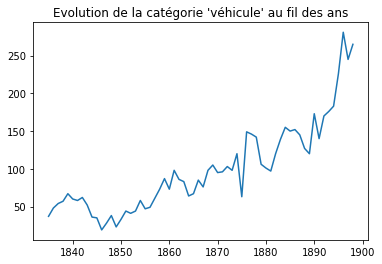

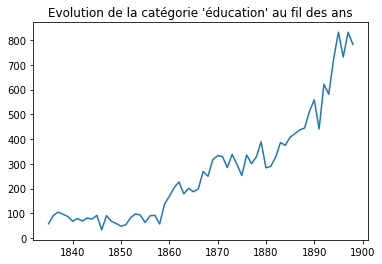

In [18]:
for cat in categories:
    data = cat_occ_year[cat_occ_year["categories"]==cat]
    plt.plot(data["annee"], data["occ"])
    plt.title(f"Evolution de la catégorie '{cat}' au fil des ans")
    plt.savefig(PLOT_DIR+ "categories_by_year/" +cat + ".png")
    plt.show()

In [19]:
count_by_year = job_occ_info.groupby("annee").sum()


df_occ_cat_year = cat_occ_year.set_index("annee").join(count_by_year, rsuffix="_annee")
df_occ_cat_year["occ_per"] = df_occ_cat_year["occ"] / df_occ_cat_year["occ_annee"] * 100

df_occ_cat_year

,categories,occ,occ_annee,occ_per
annee,,,,
1835,NA,6,3653,0.164249
1835,agriculture,111,3653,3.038598
1835,alimentation,71,3653,1.943608
1835,animaux,10,3653,0.273748
1835,apprenti,69,3653,1.888858
...,...,...,...,...
1898,verre,14,13290,0.105342
1898,viande,97,13290,0.729872
1898,vin,159,13290,1.196388


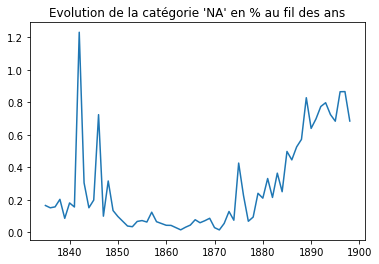

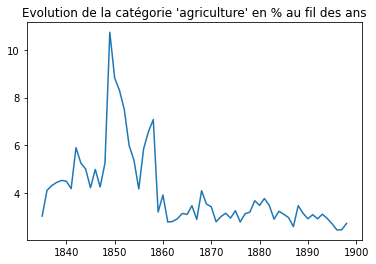

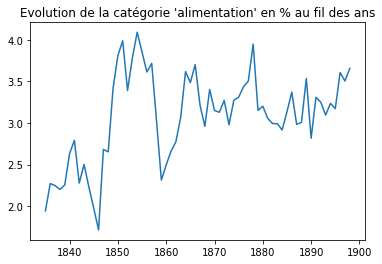

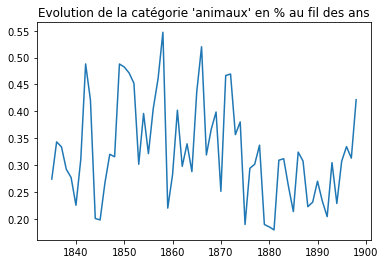

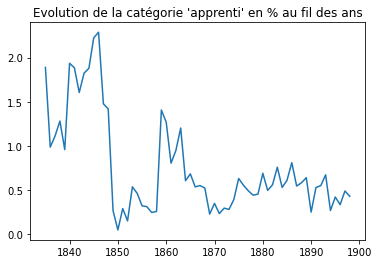

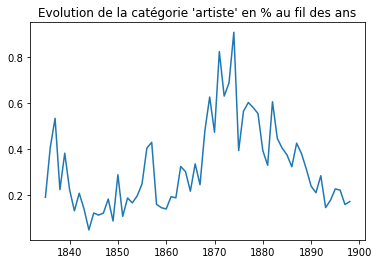

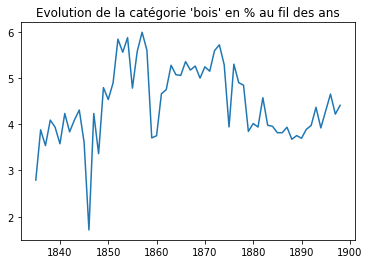

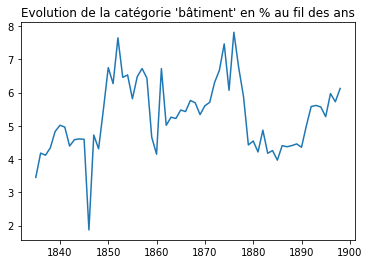

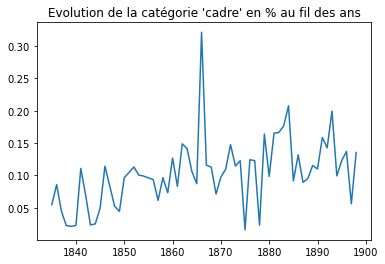

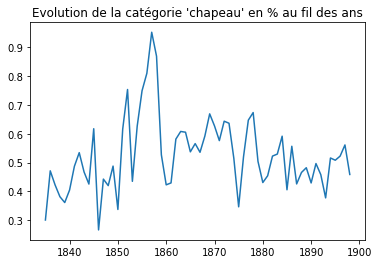

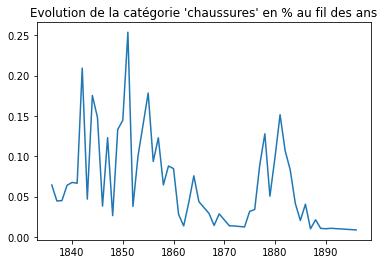

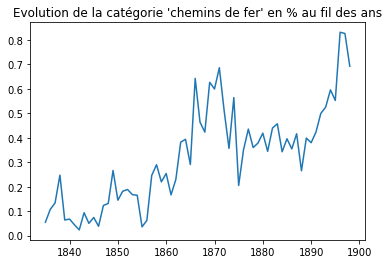

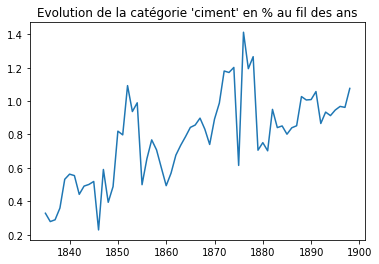

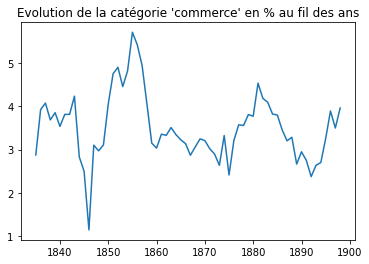

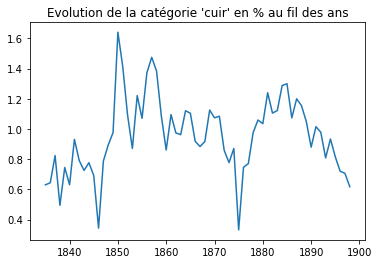

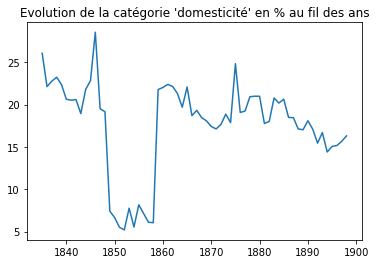

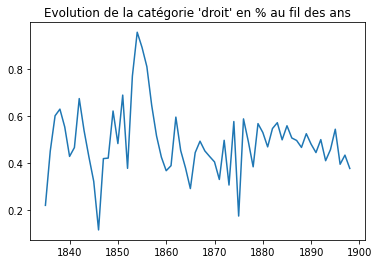

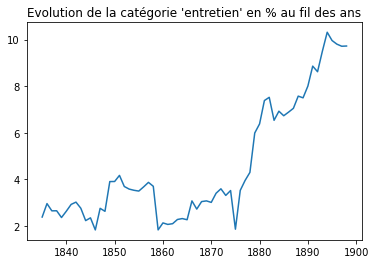

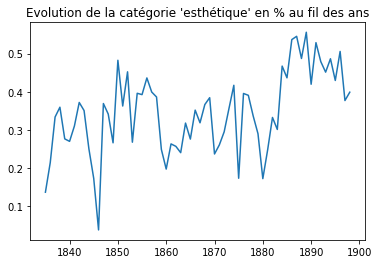

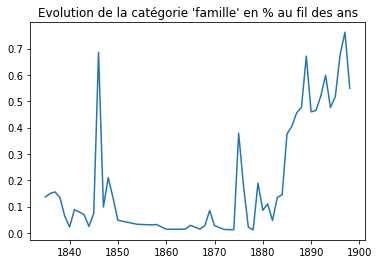

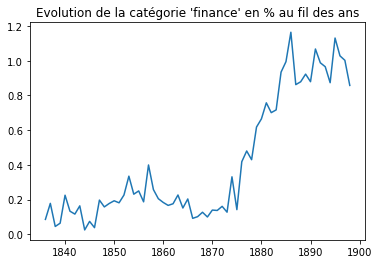

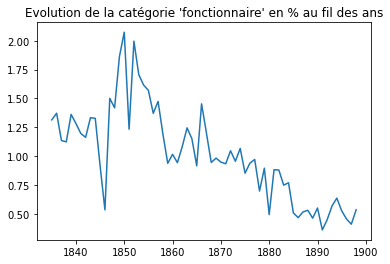

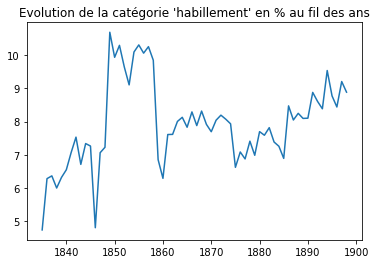

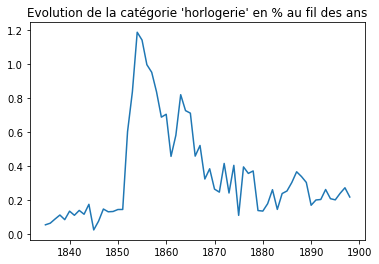

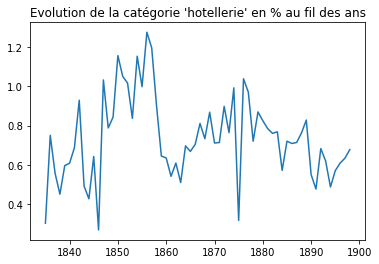

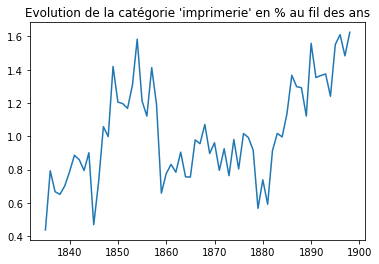

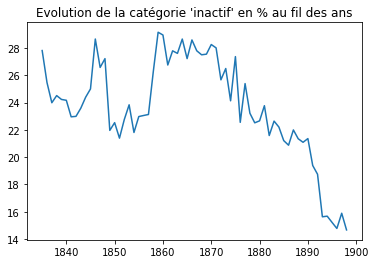

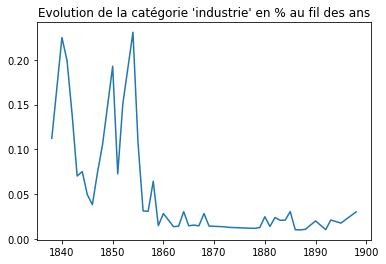

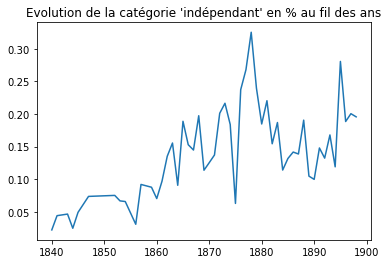

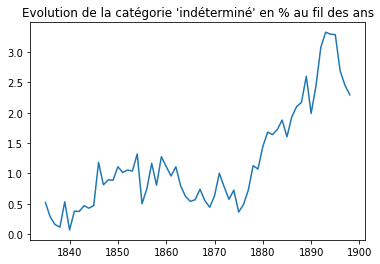

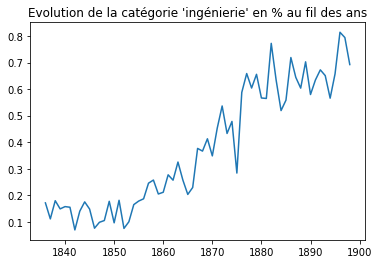

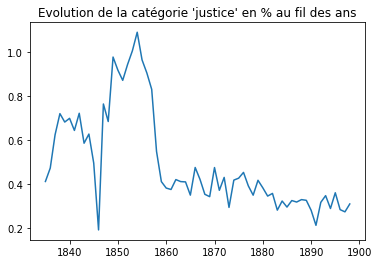

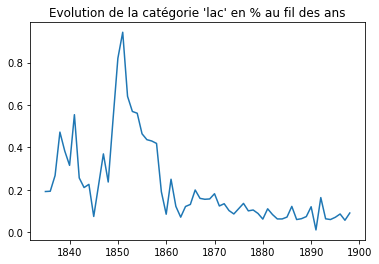

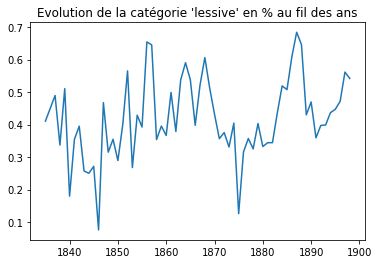

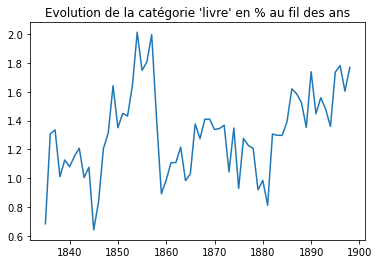

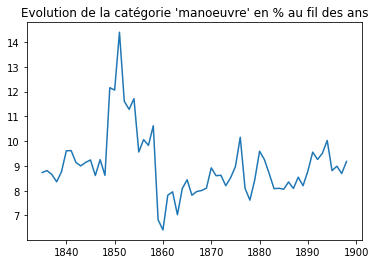

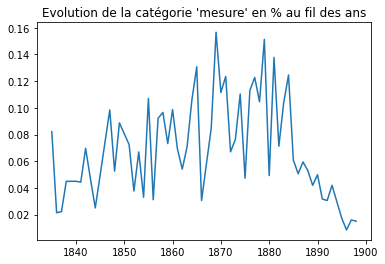

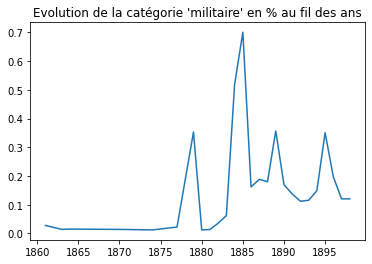

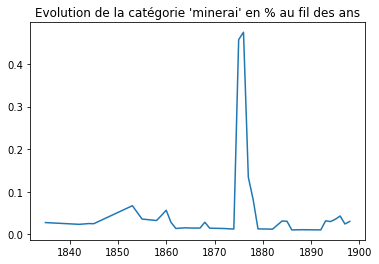

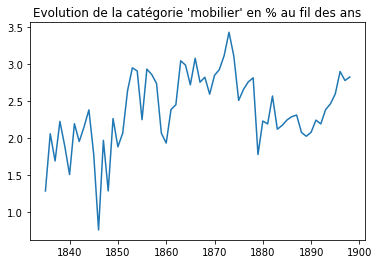

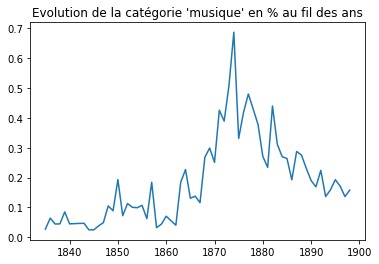

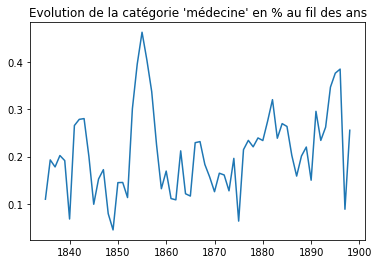

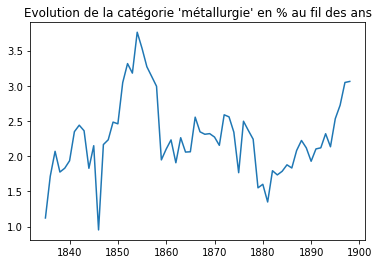

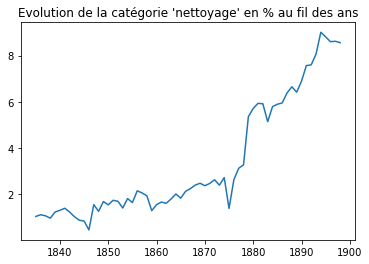

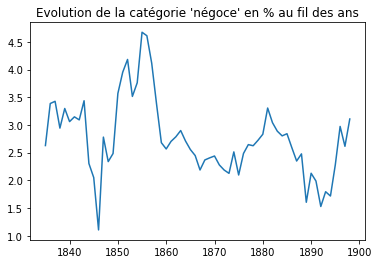

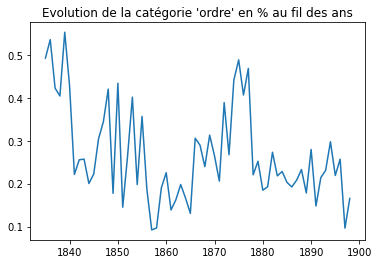

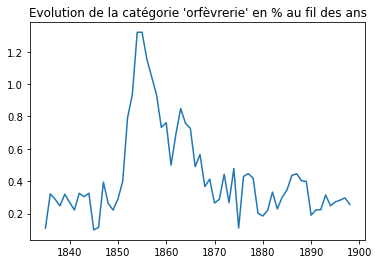

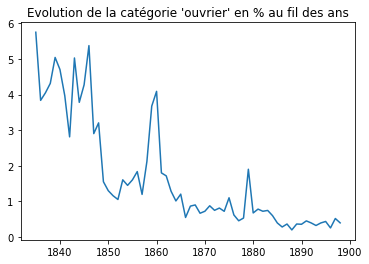

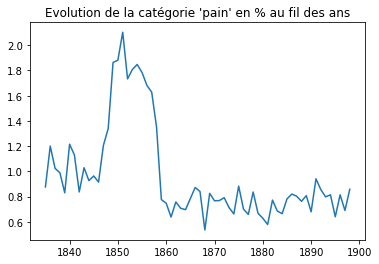

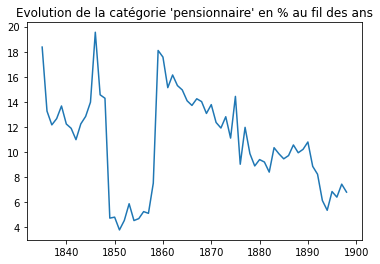

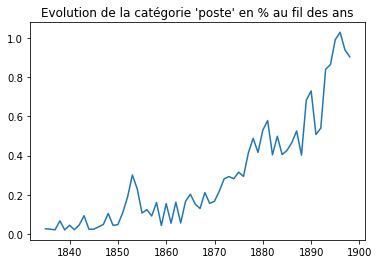

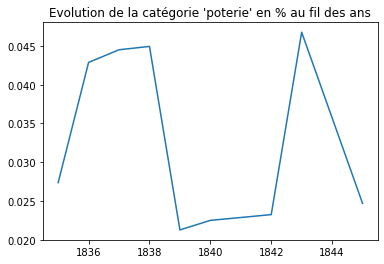

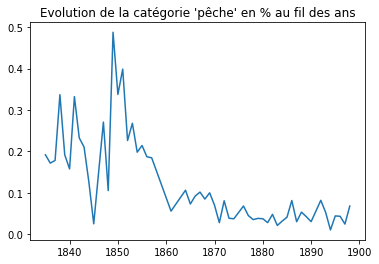

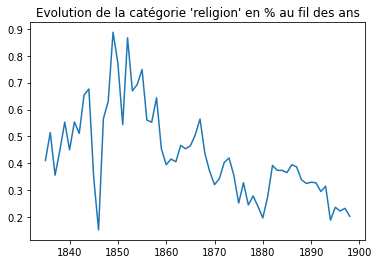

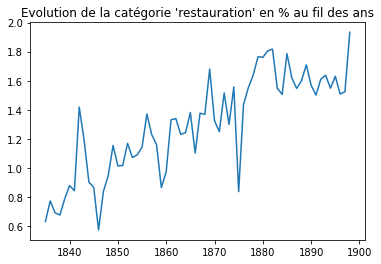

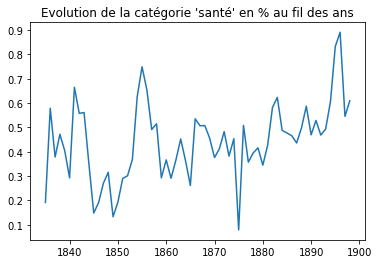

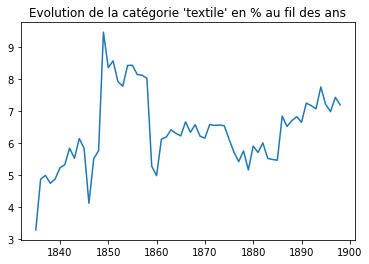

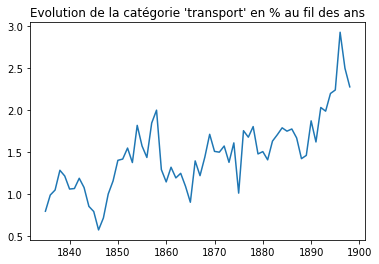

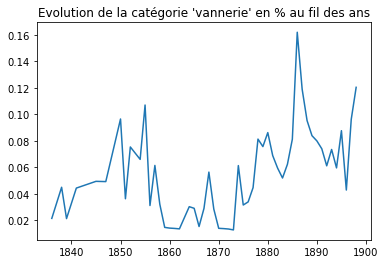

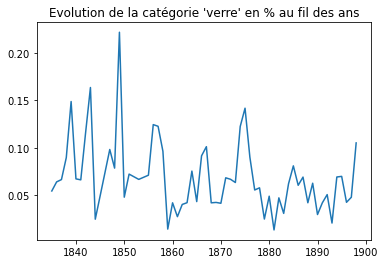

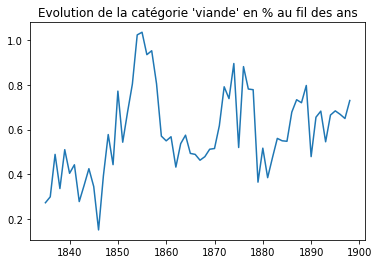

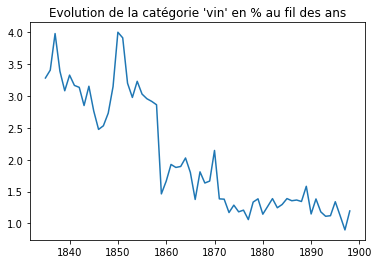

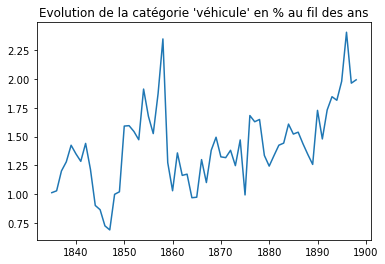

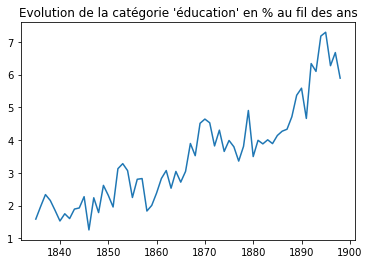

In [20]:
for cat in categories:
    data = df_occ_cat_year[df_occ_cat_year["categories"]==cat]
    plt.plot(data.index, data["occ_per"])
    plt.title(f"Evolution de la catégorie '{cat}' en % au fil des ans")
    plt.savefig(PLOT_DIR+ "categories_by_year_per/" +cat + ".png")
    plt.show()